In [1]:
import tensorflow as tf
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, HTML

In [4]:
gan_generator = load_model("./model/dcgan/DCGAN_Generator.h5")
gan_generator.summary()

# class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Model: "generator_GAN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2048)              264192    
                                                                 
 reshape (Reshape)           (None, 2, 2, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 4, 4, 256)        2097408   
 nspose)                                                         
                                                                 
 batch_normalization_4 (Batc  (None, 4, 4, 256)        1024      
 hNormalization)                                                 
                                                                 
 p_re_lu (PReLU)             (None, 4, 4, 256)         4096      
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 8, 8, 128)      

4/4 [==============================] - 0s 16ms/step


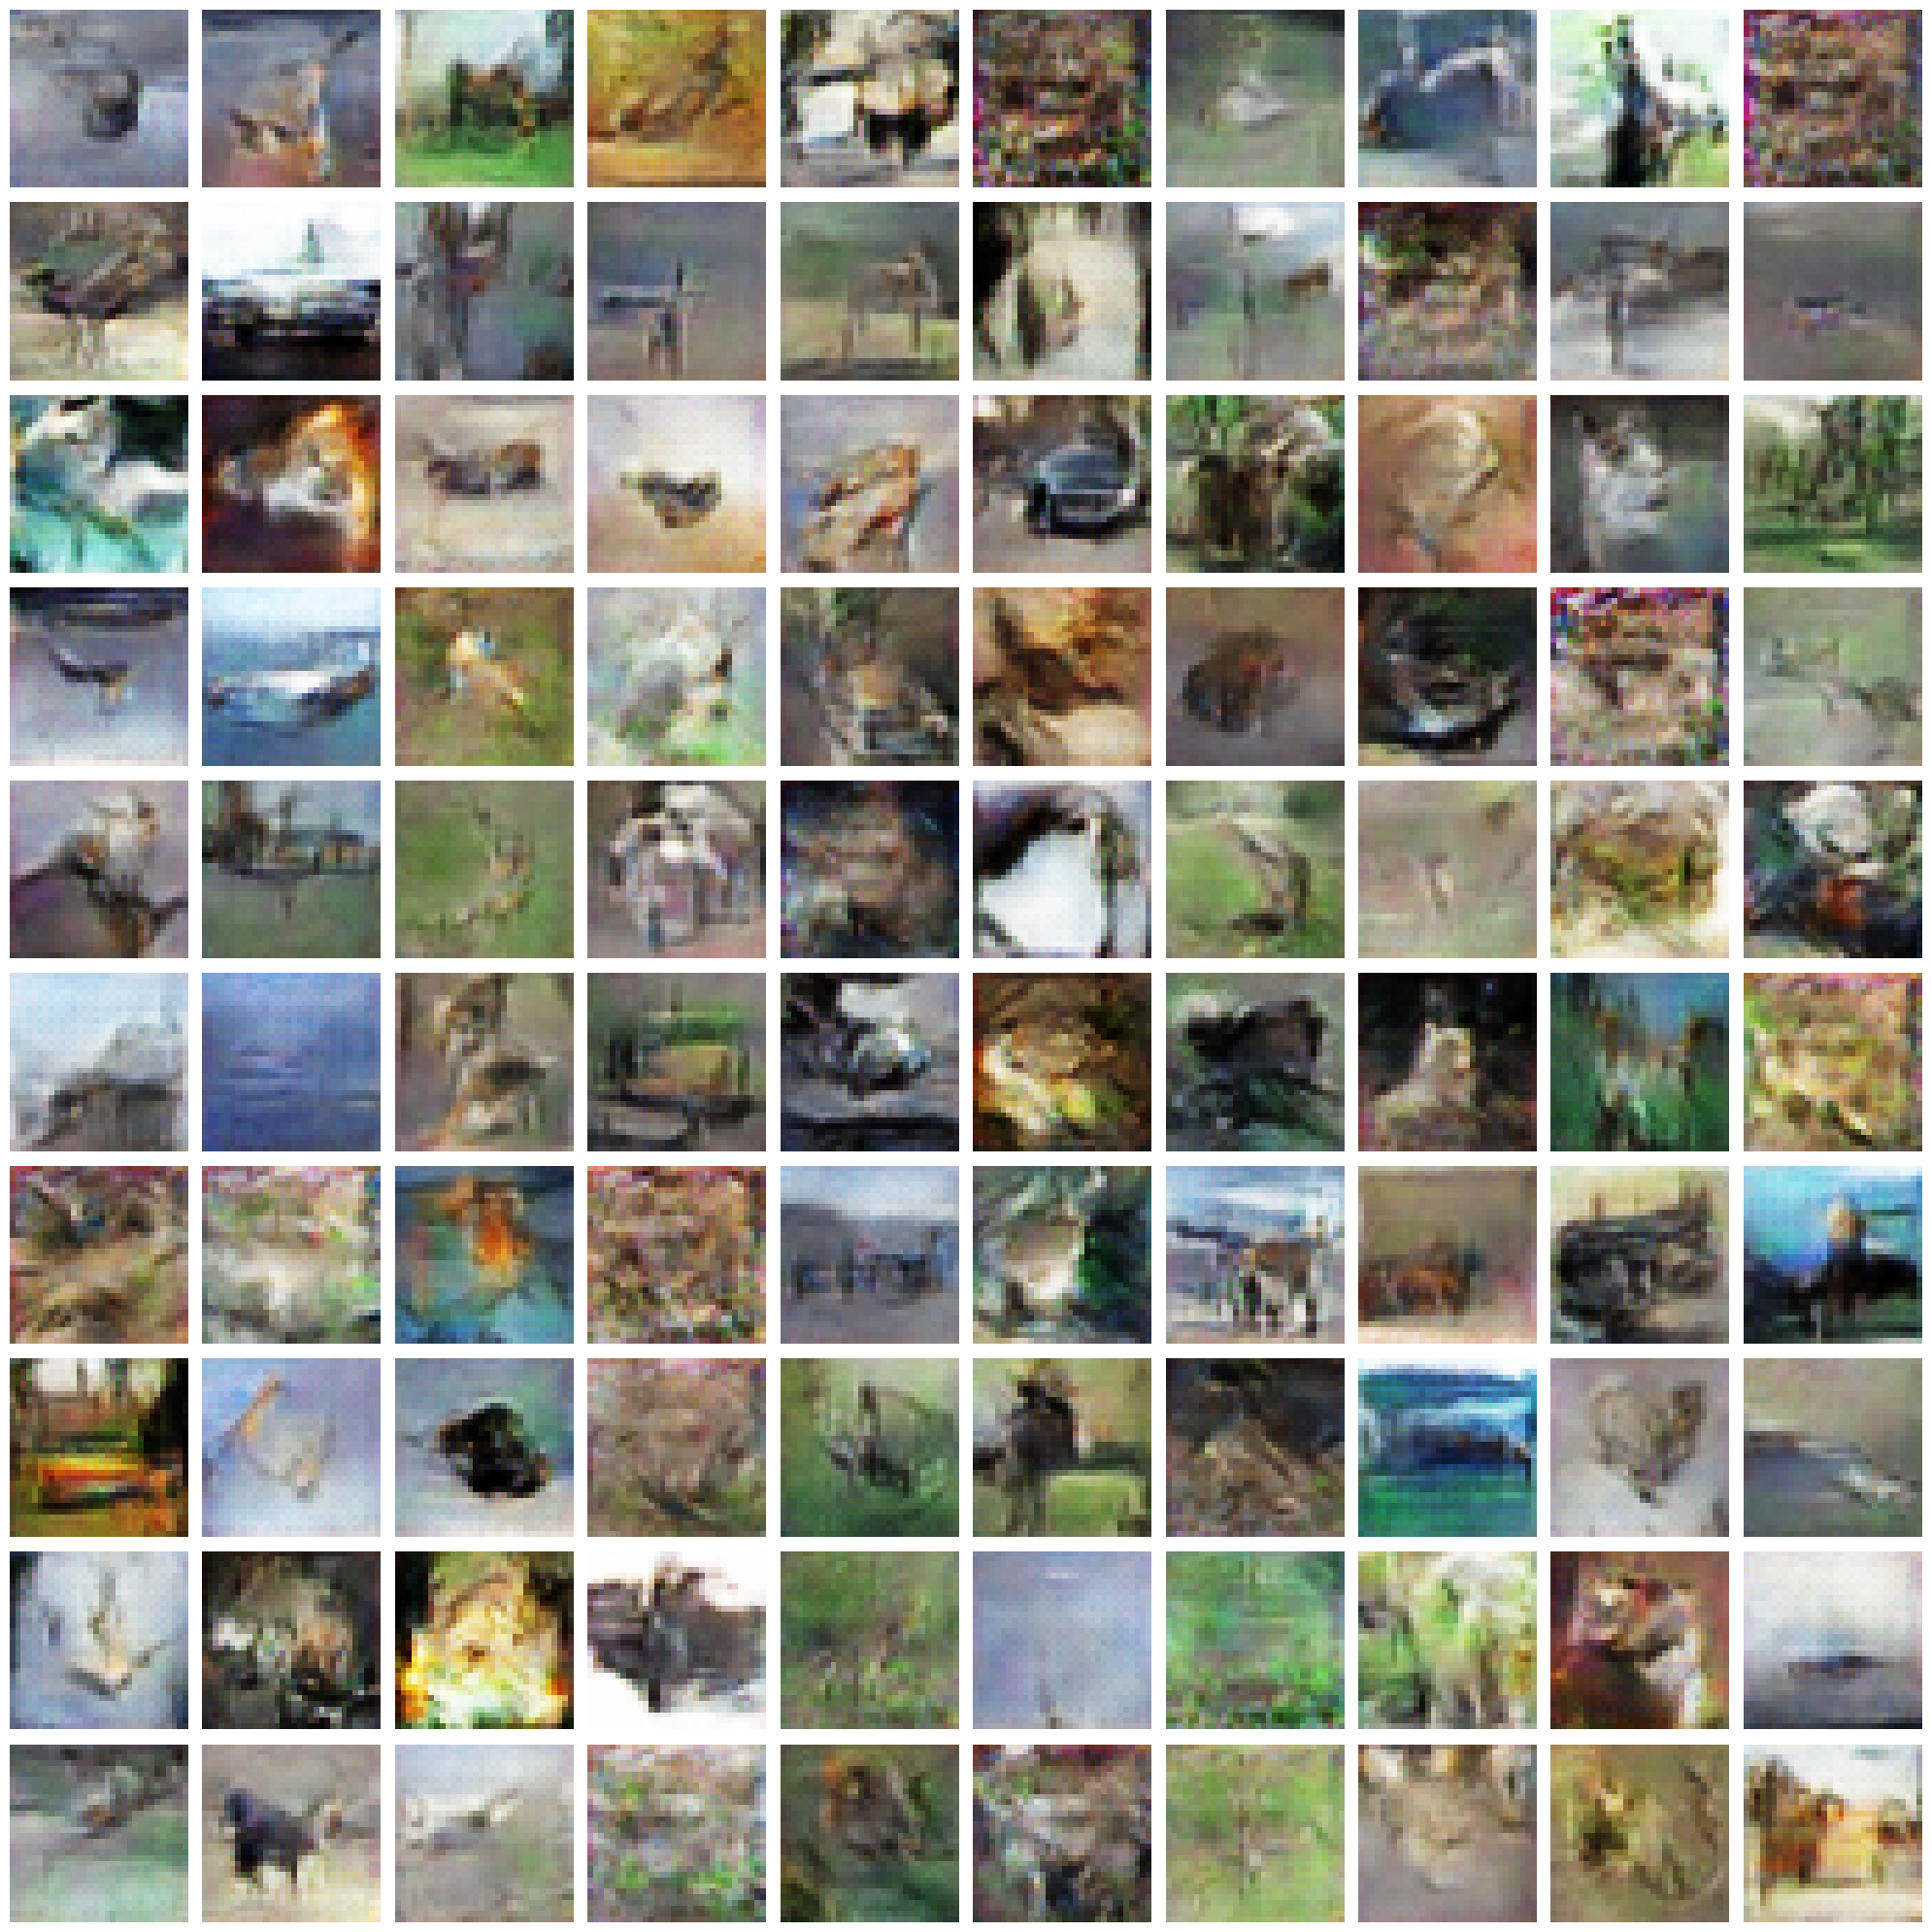

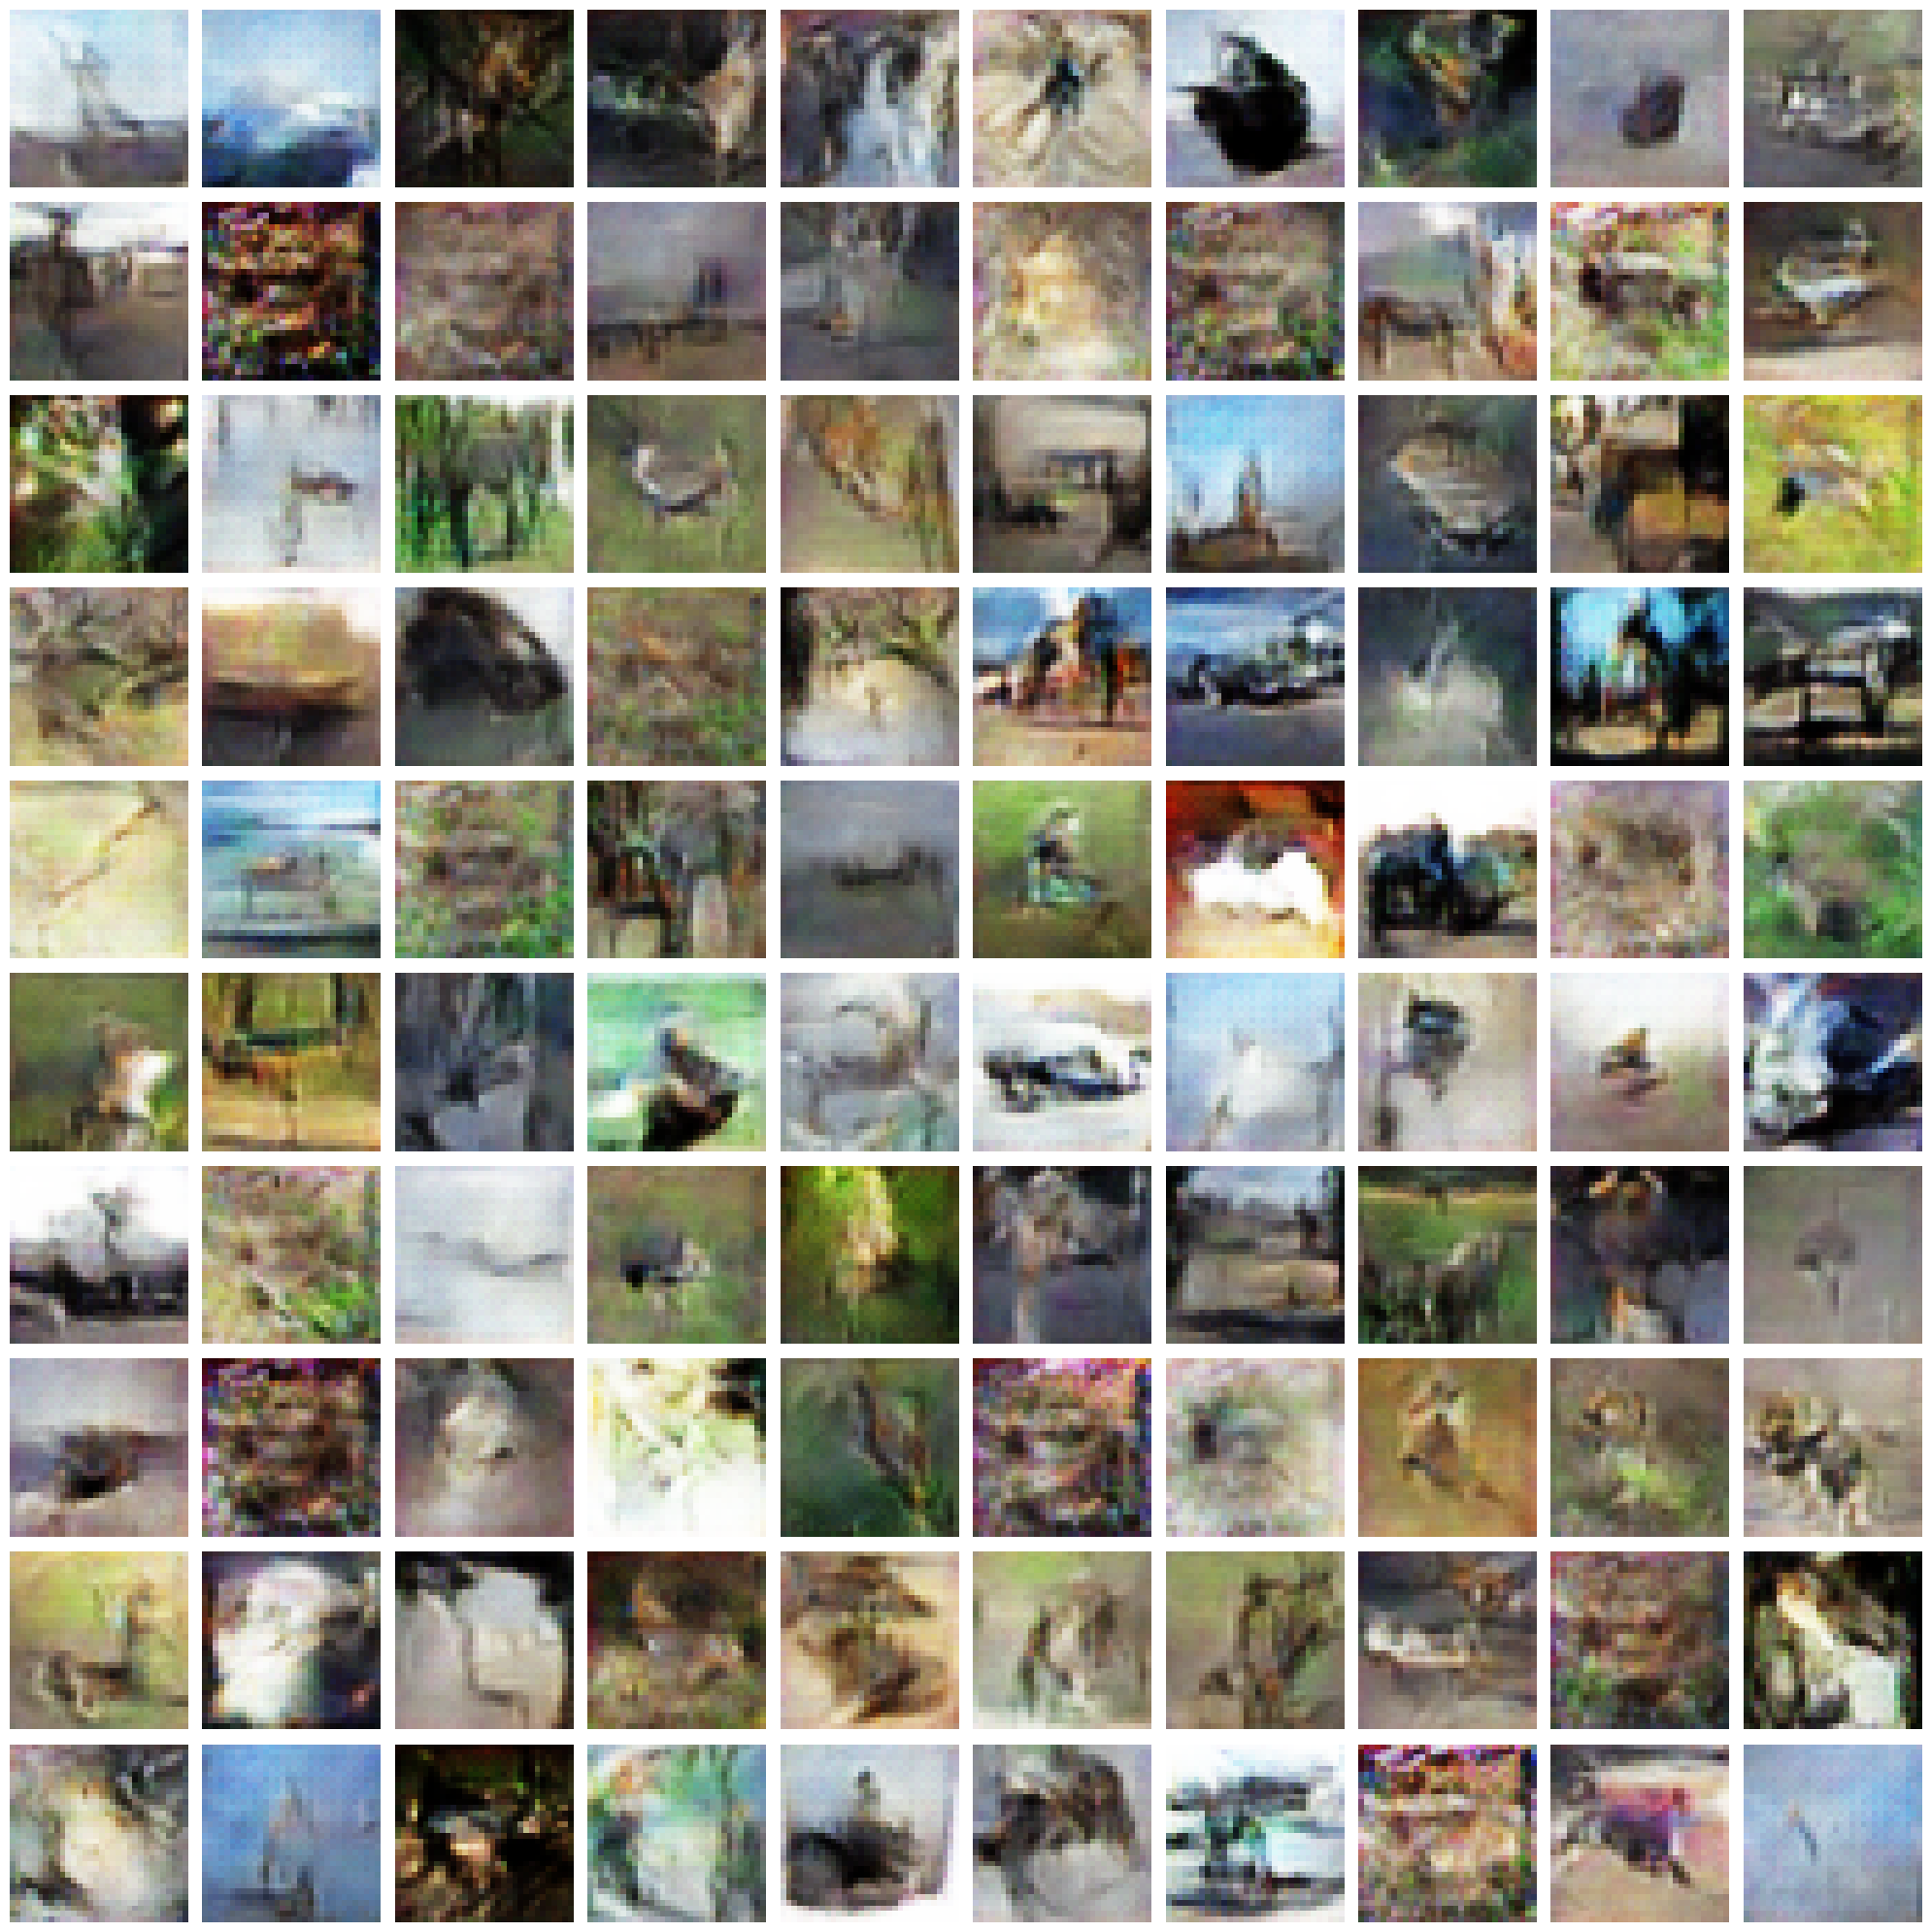

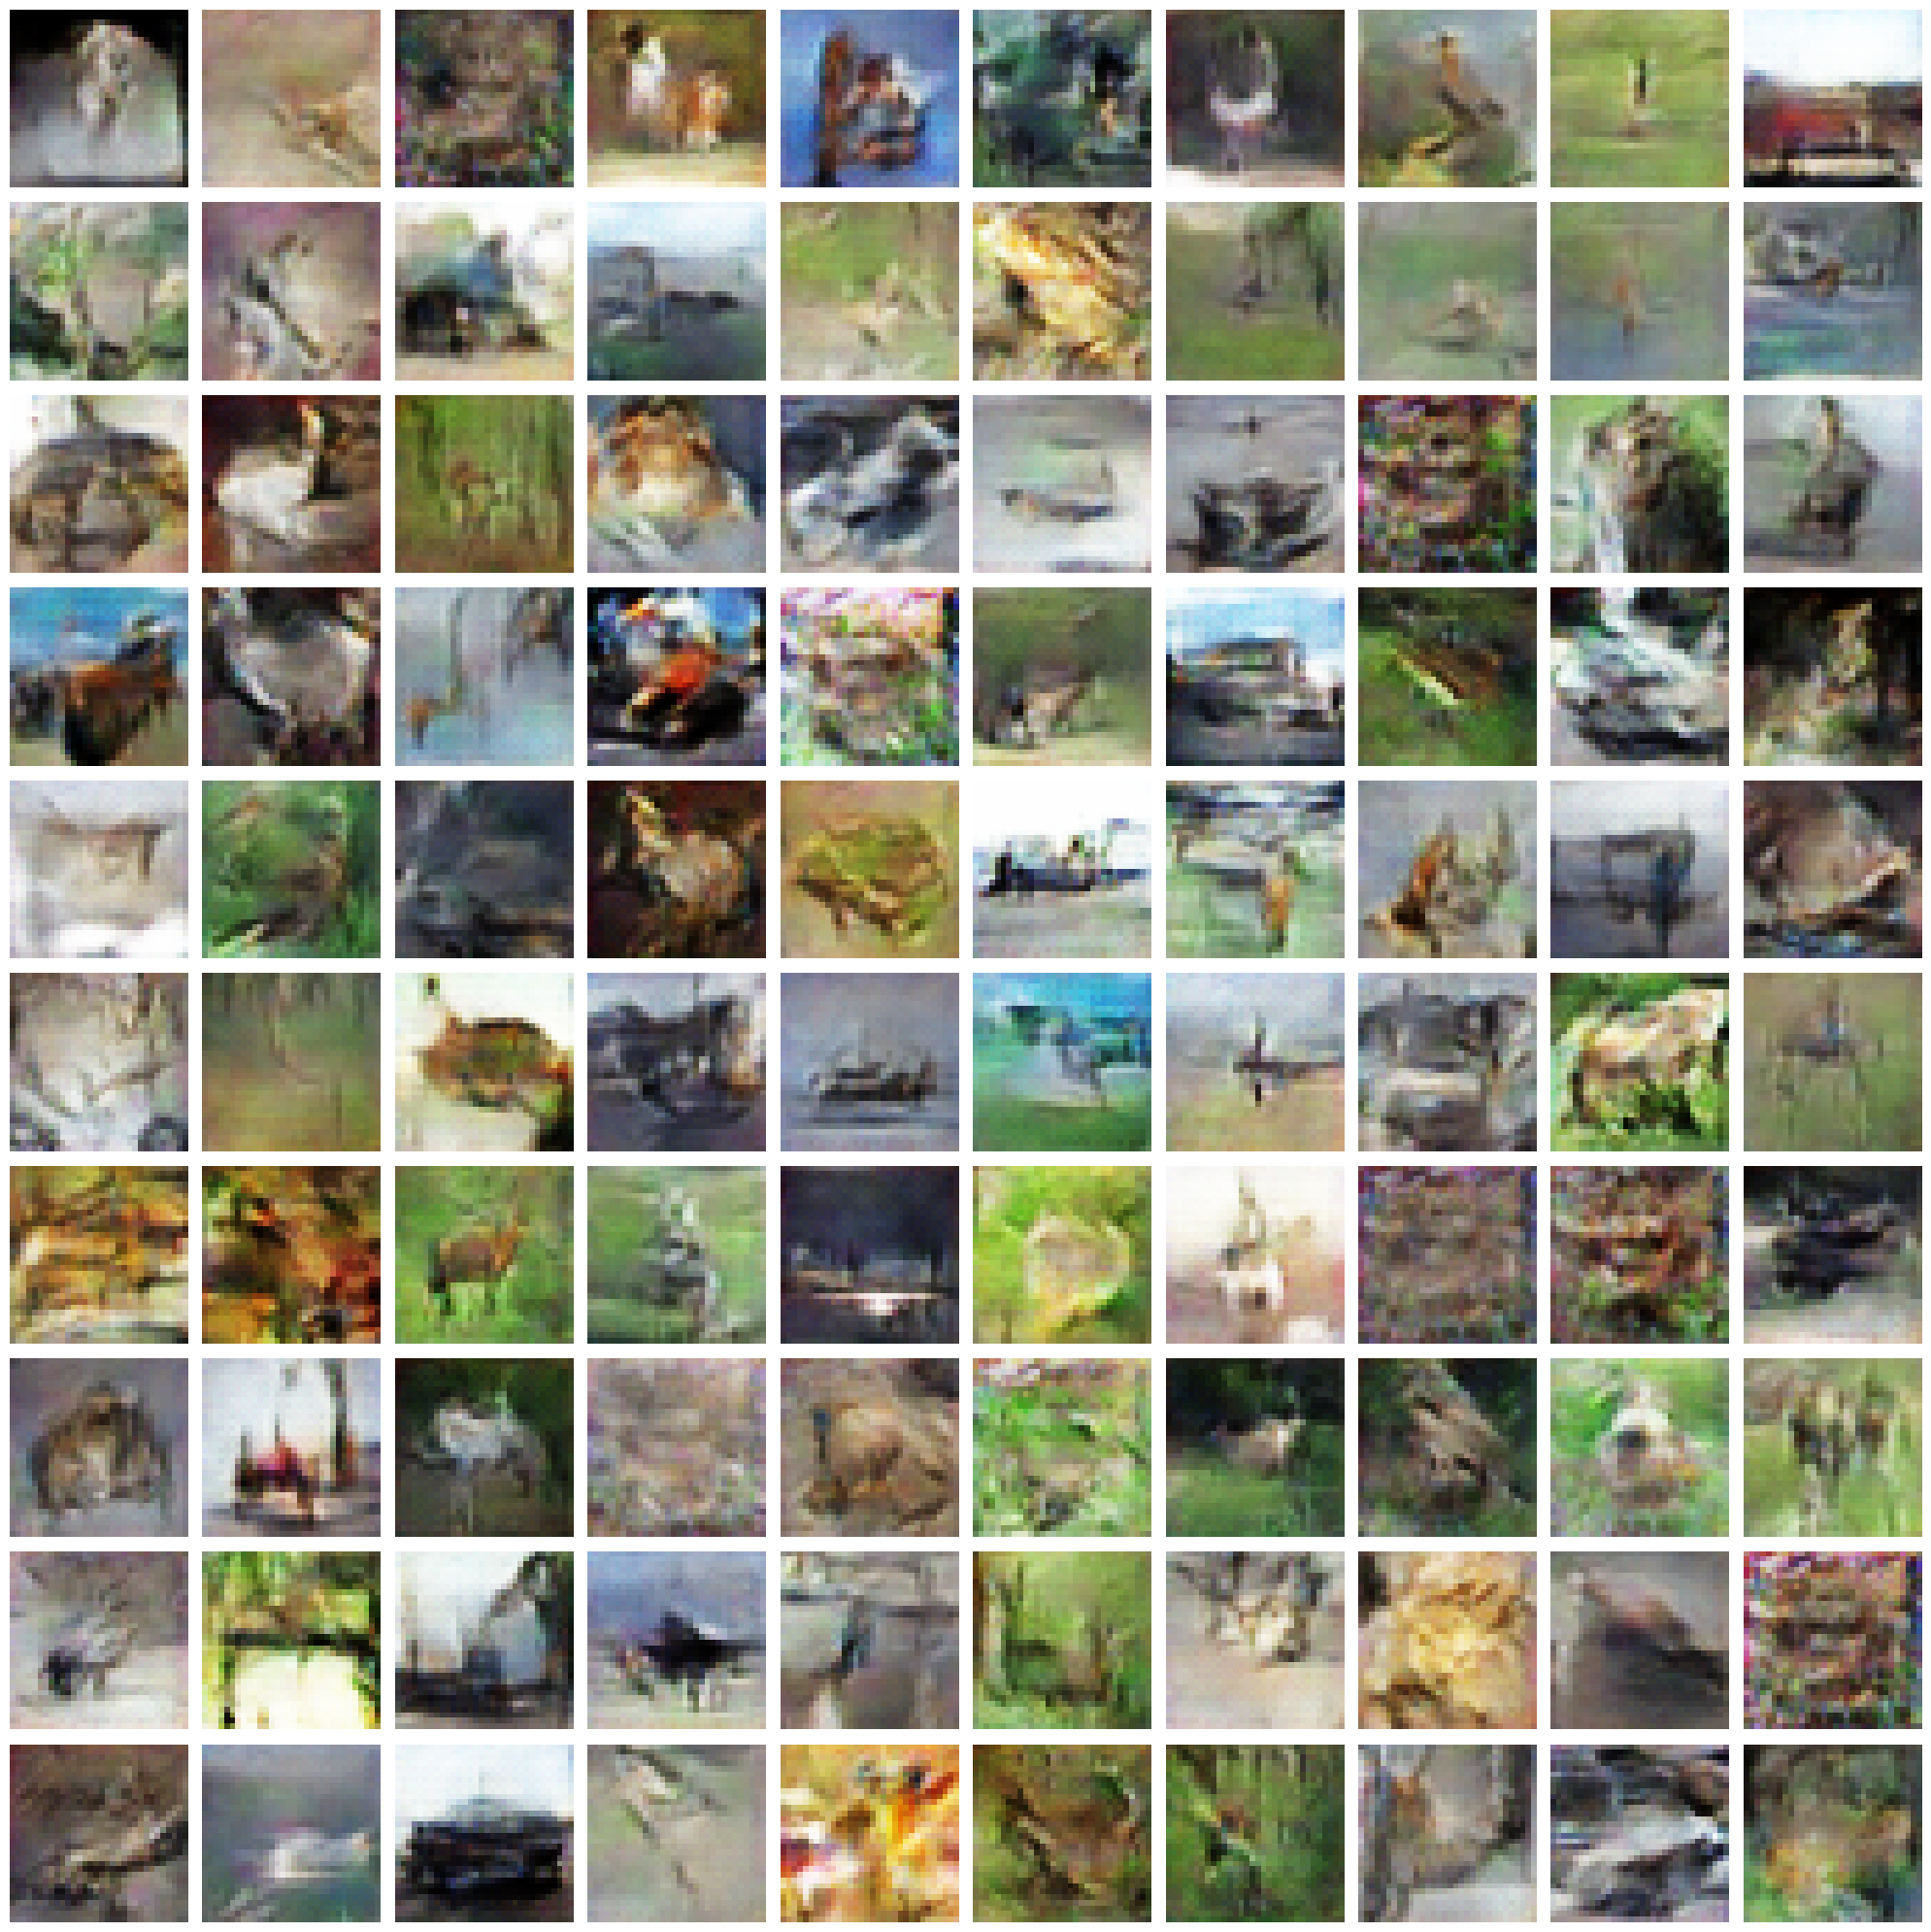

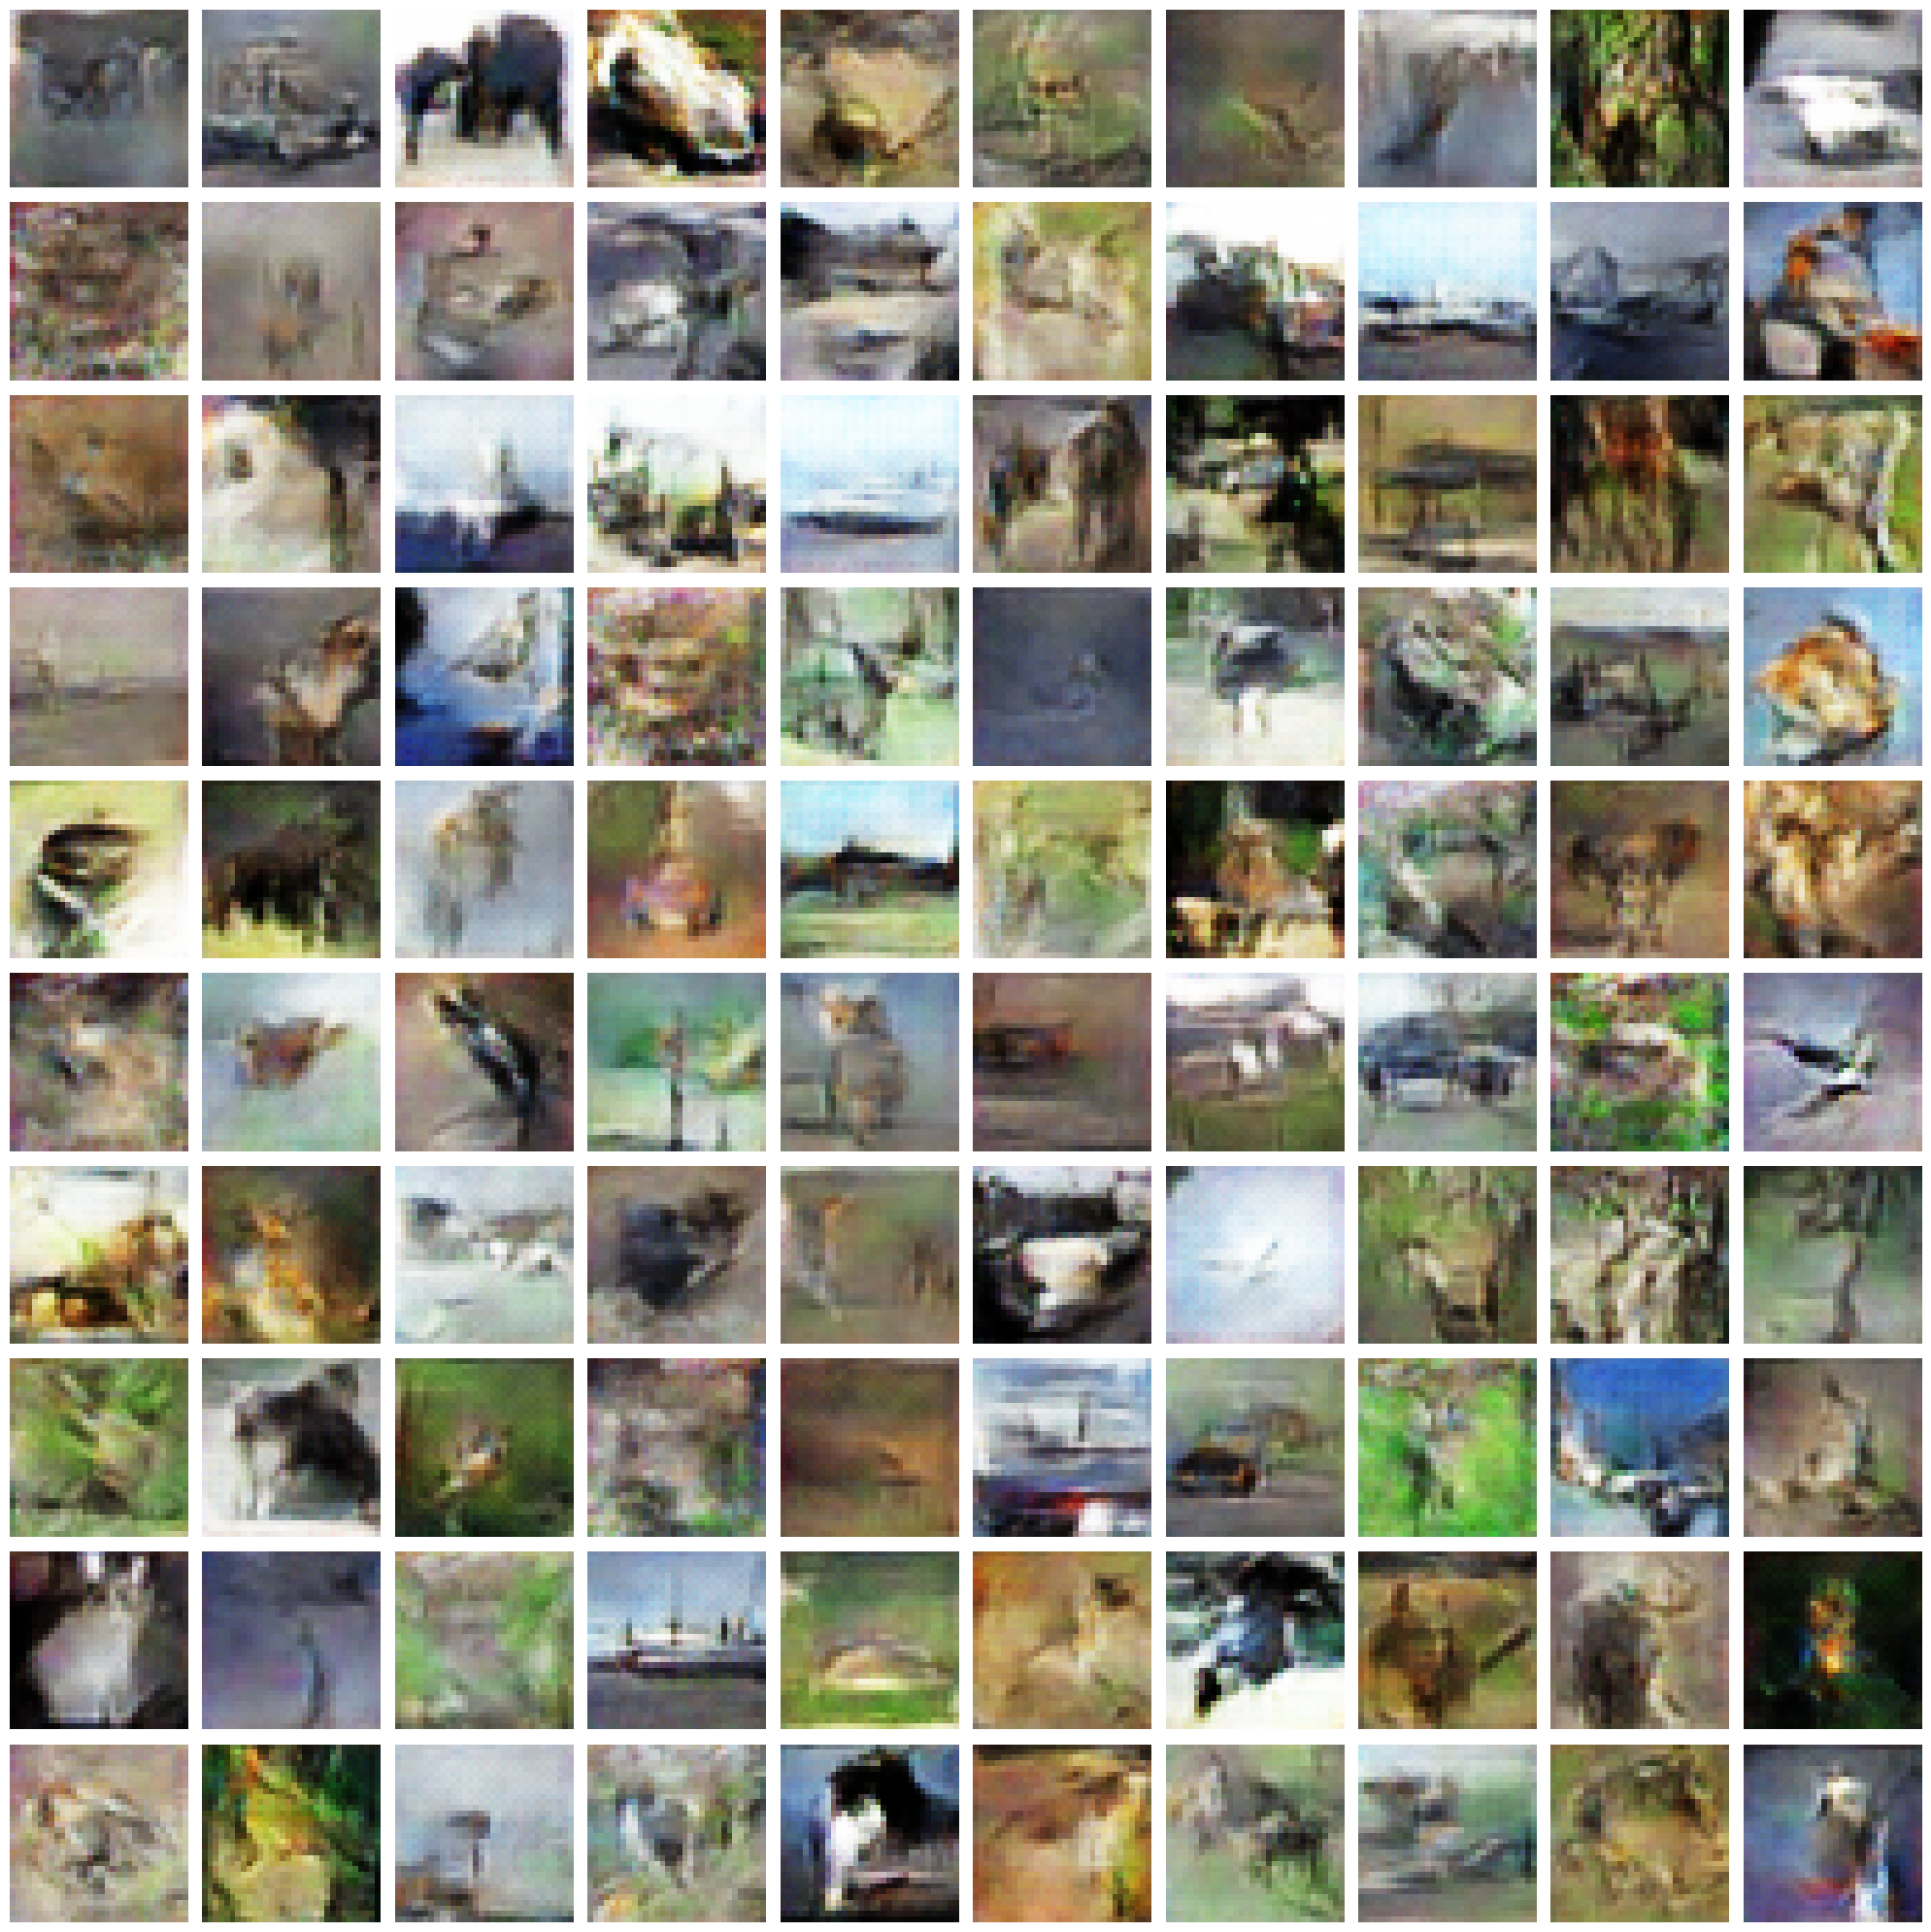

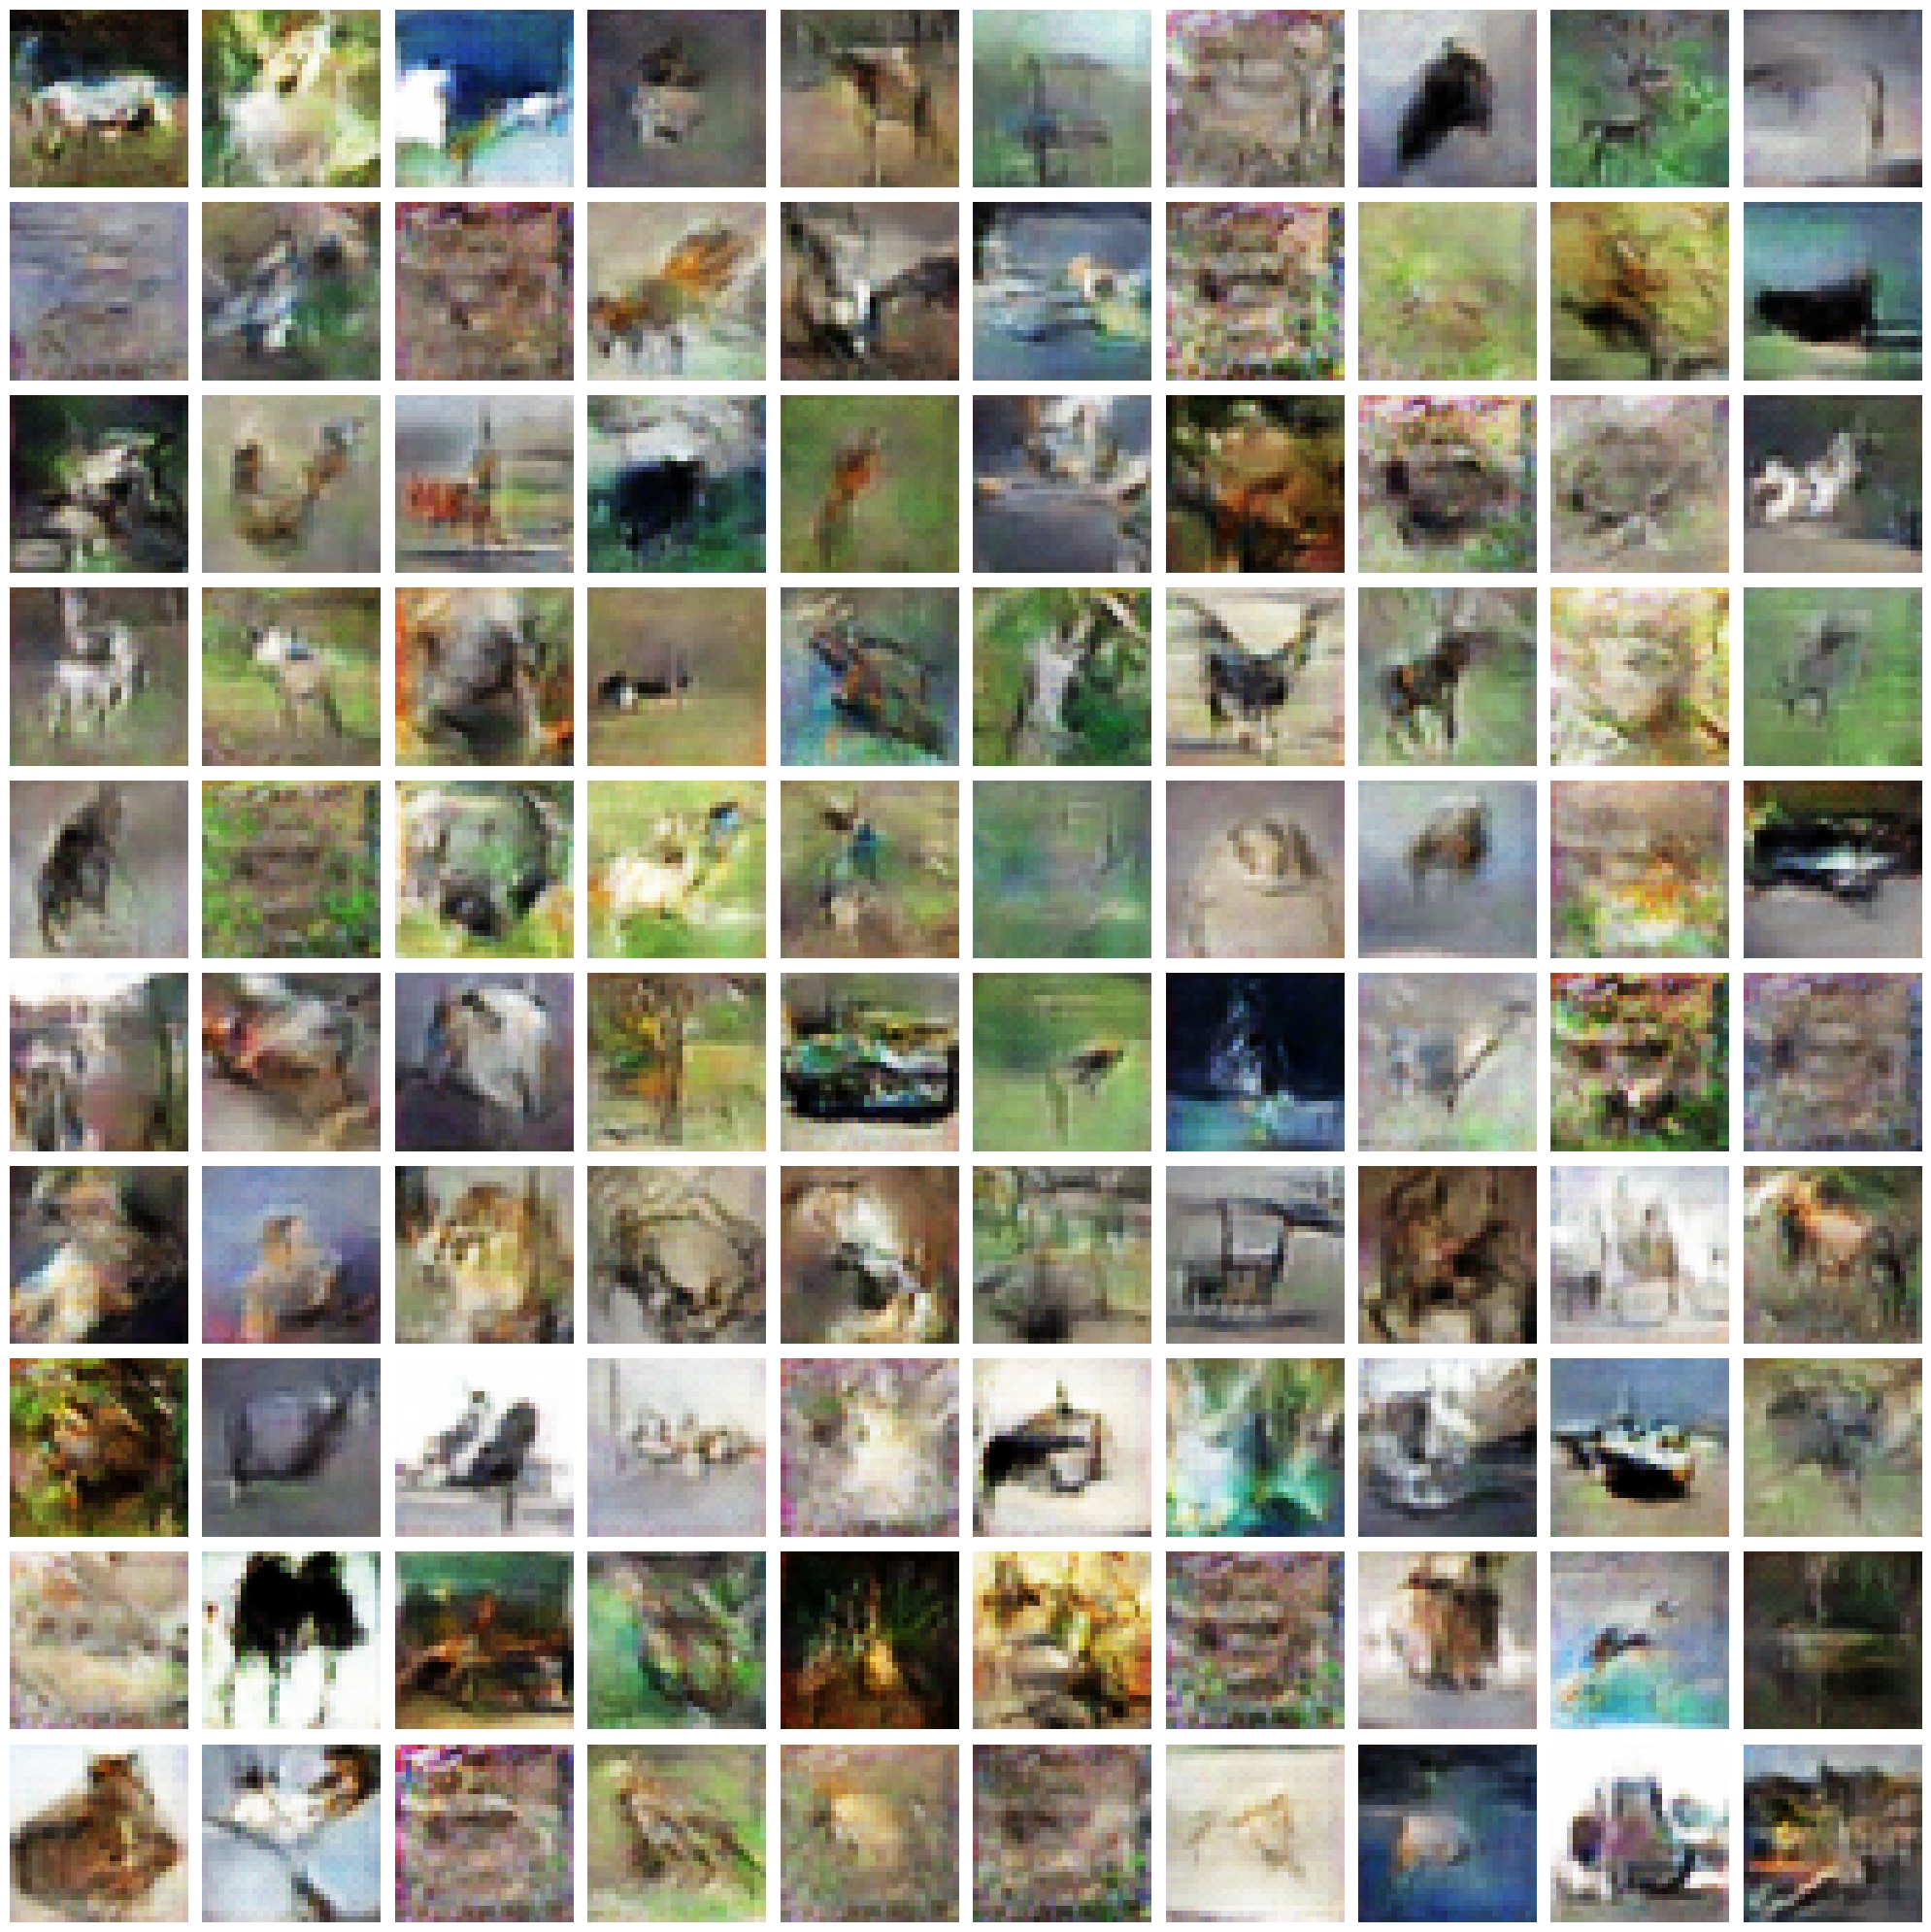

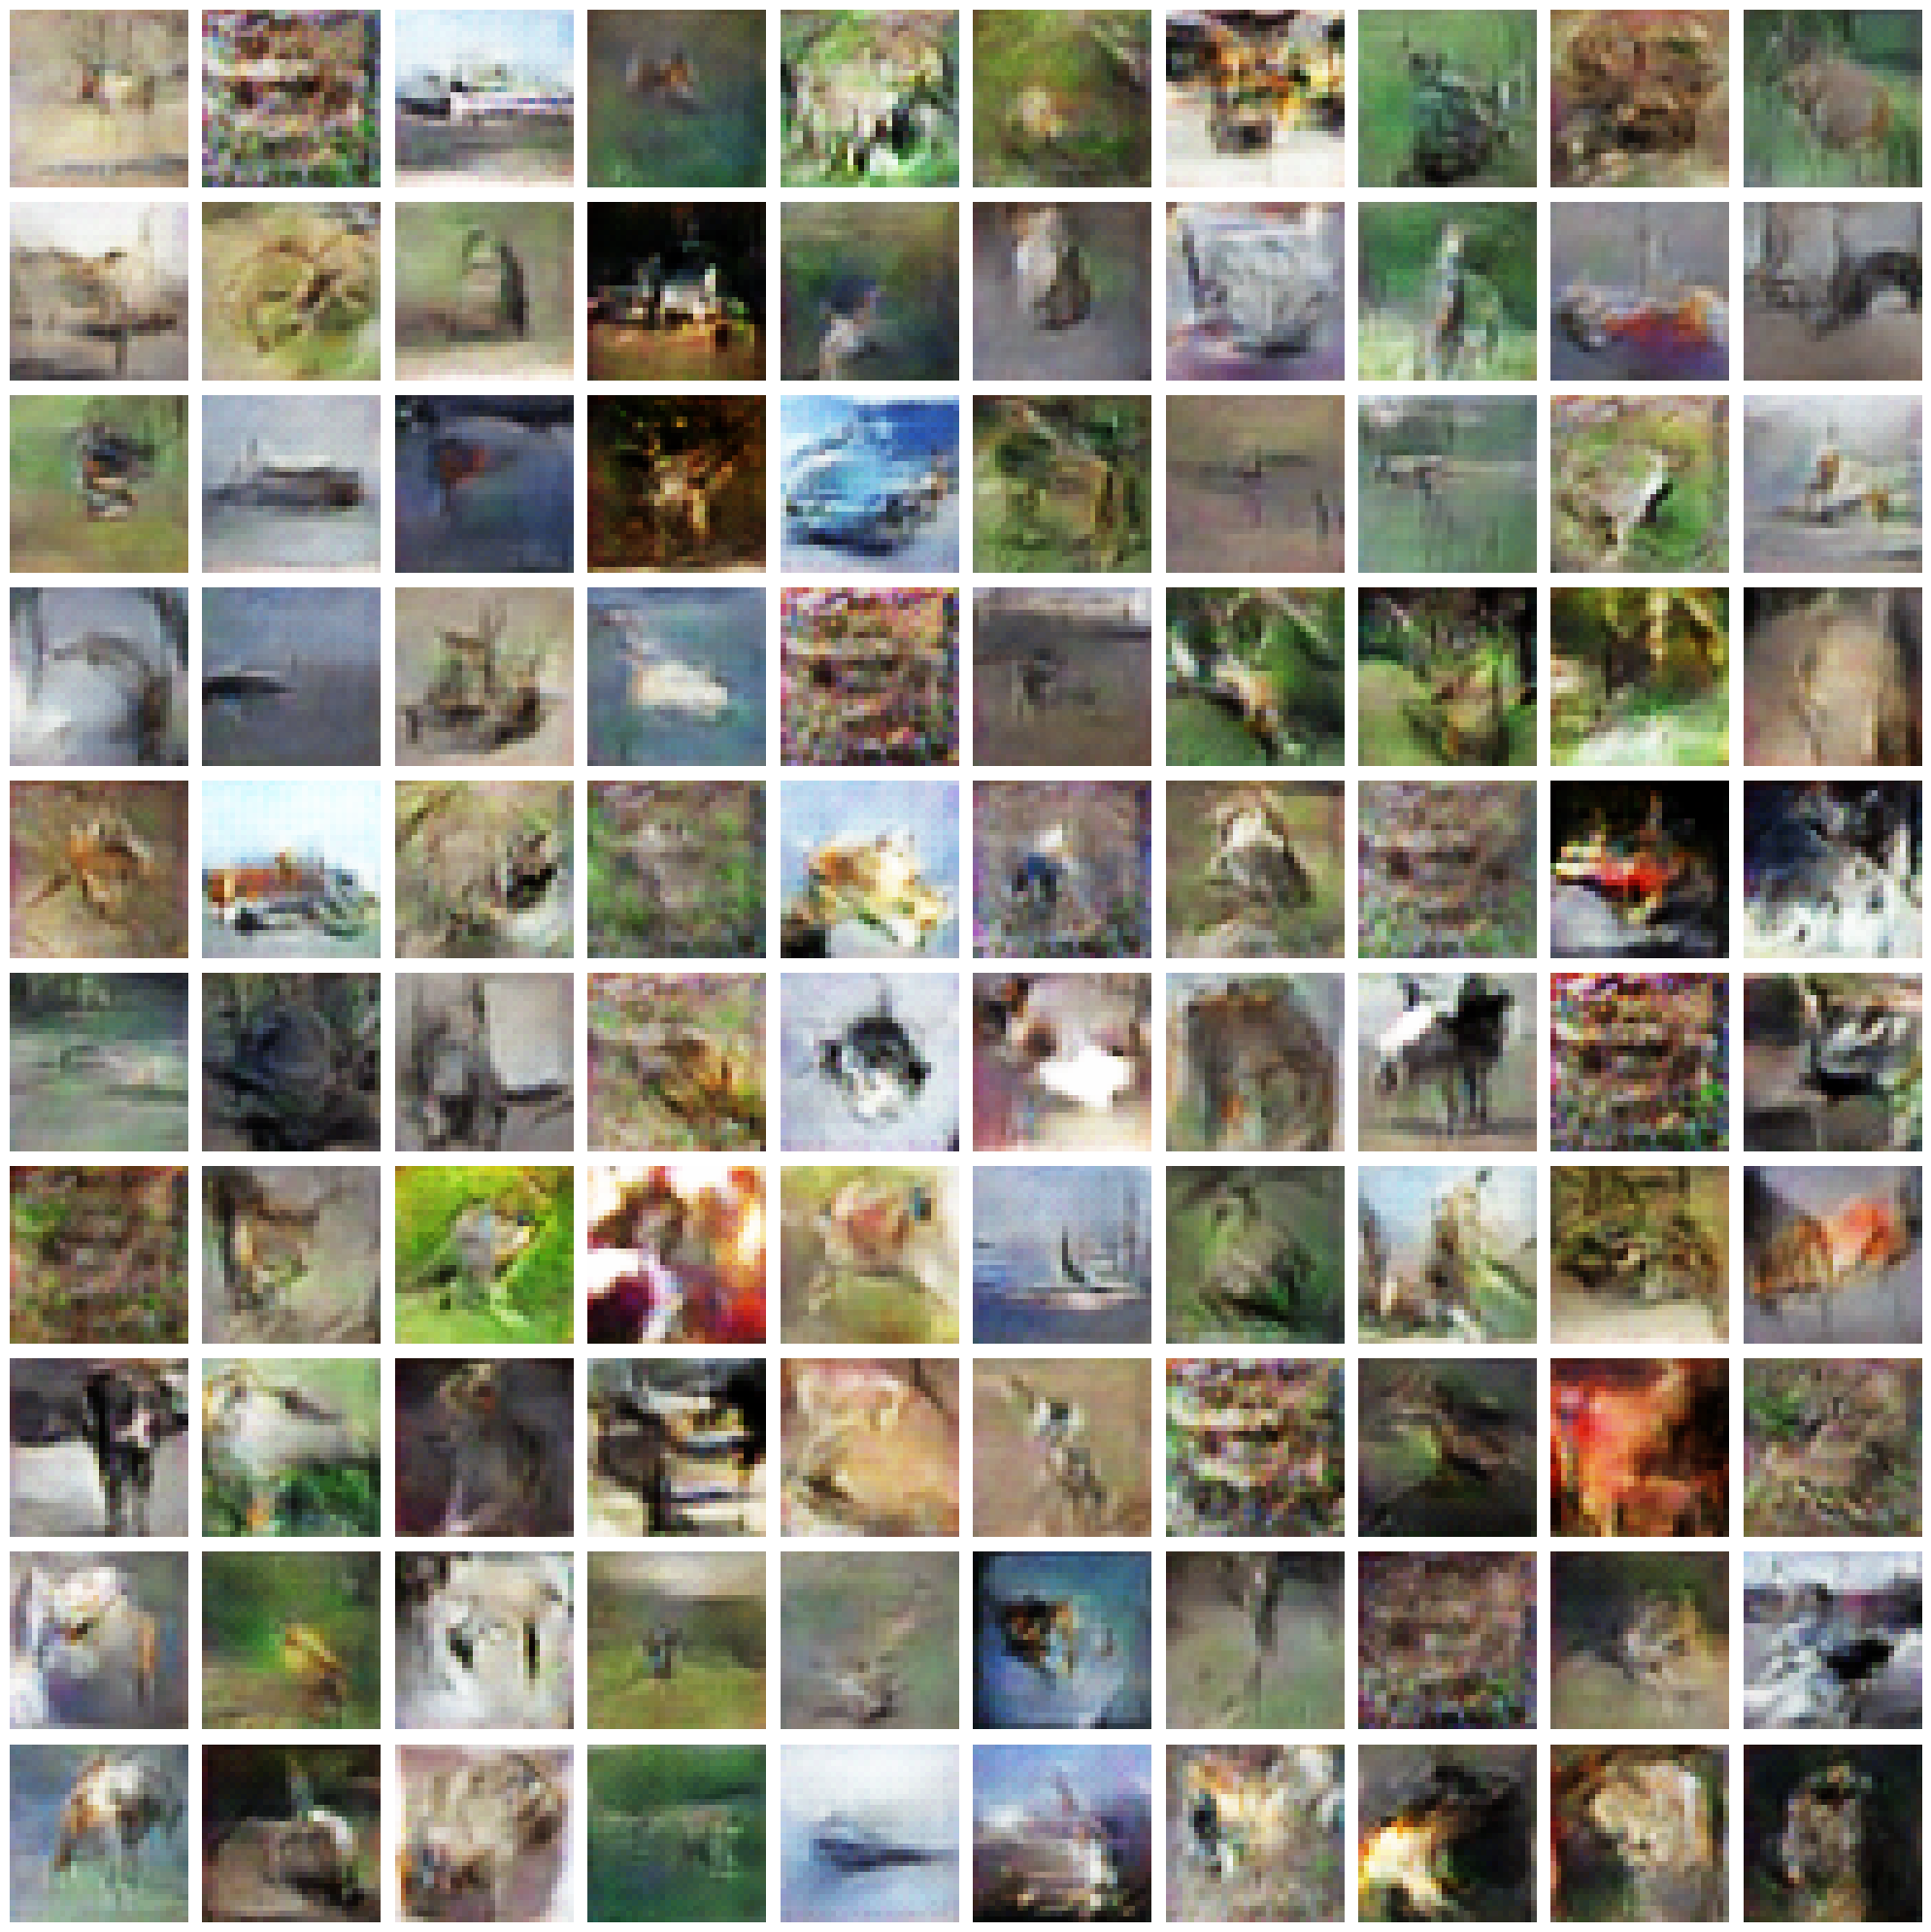

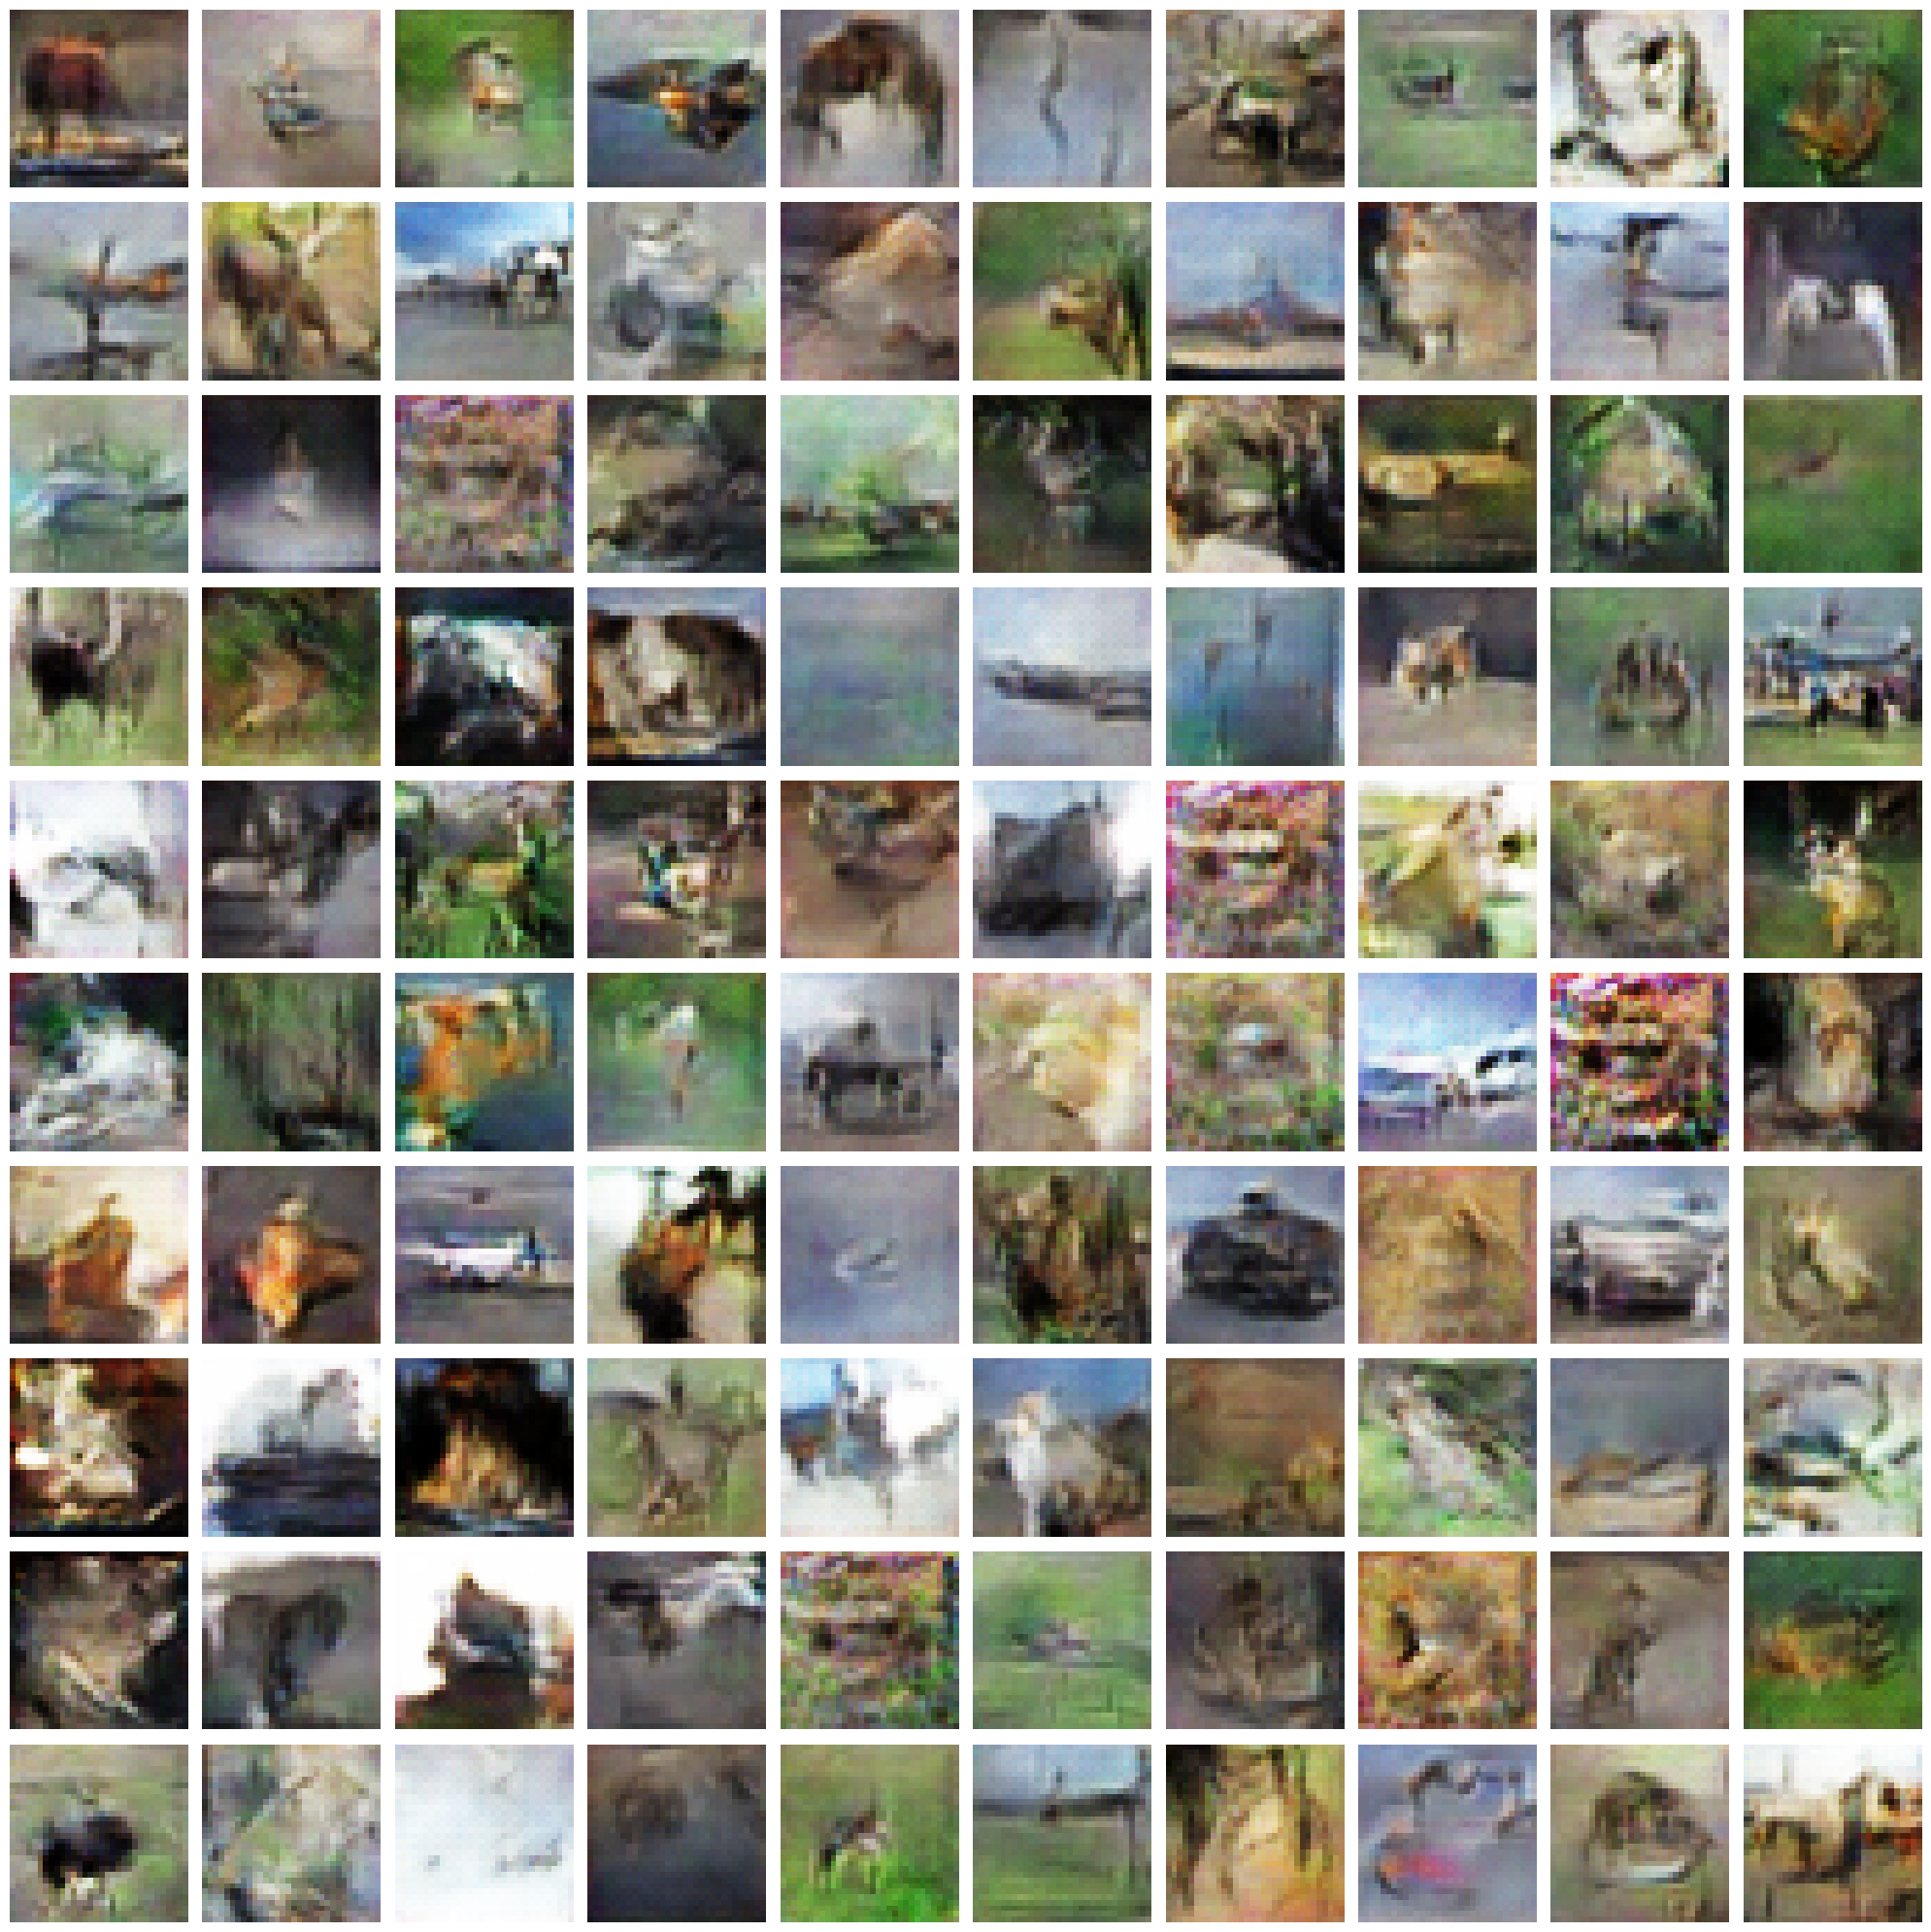

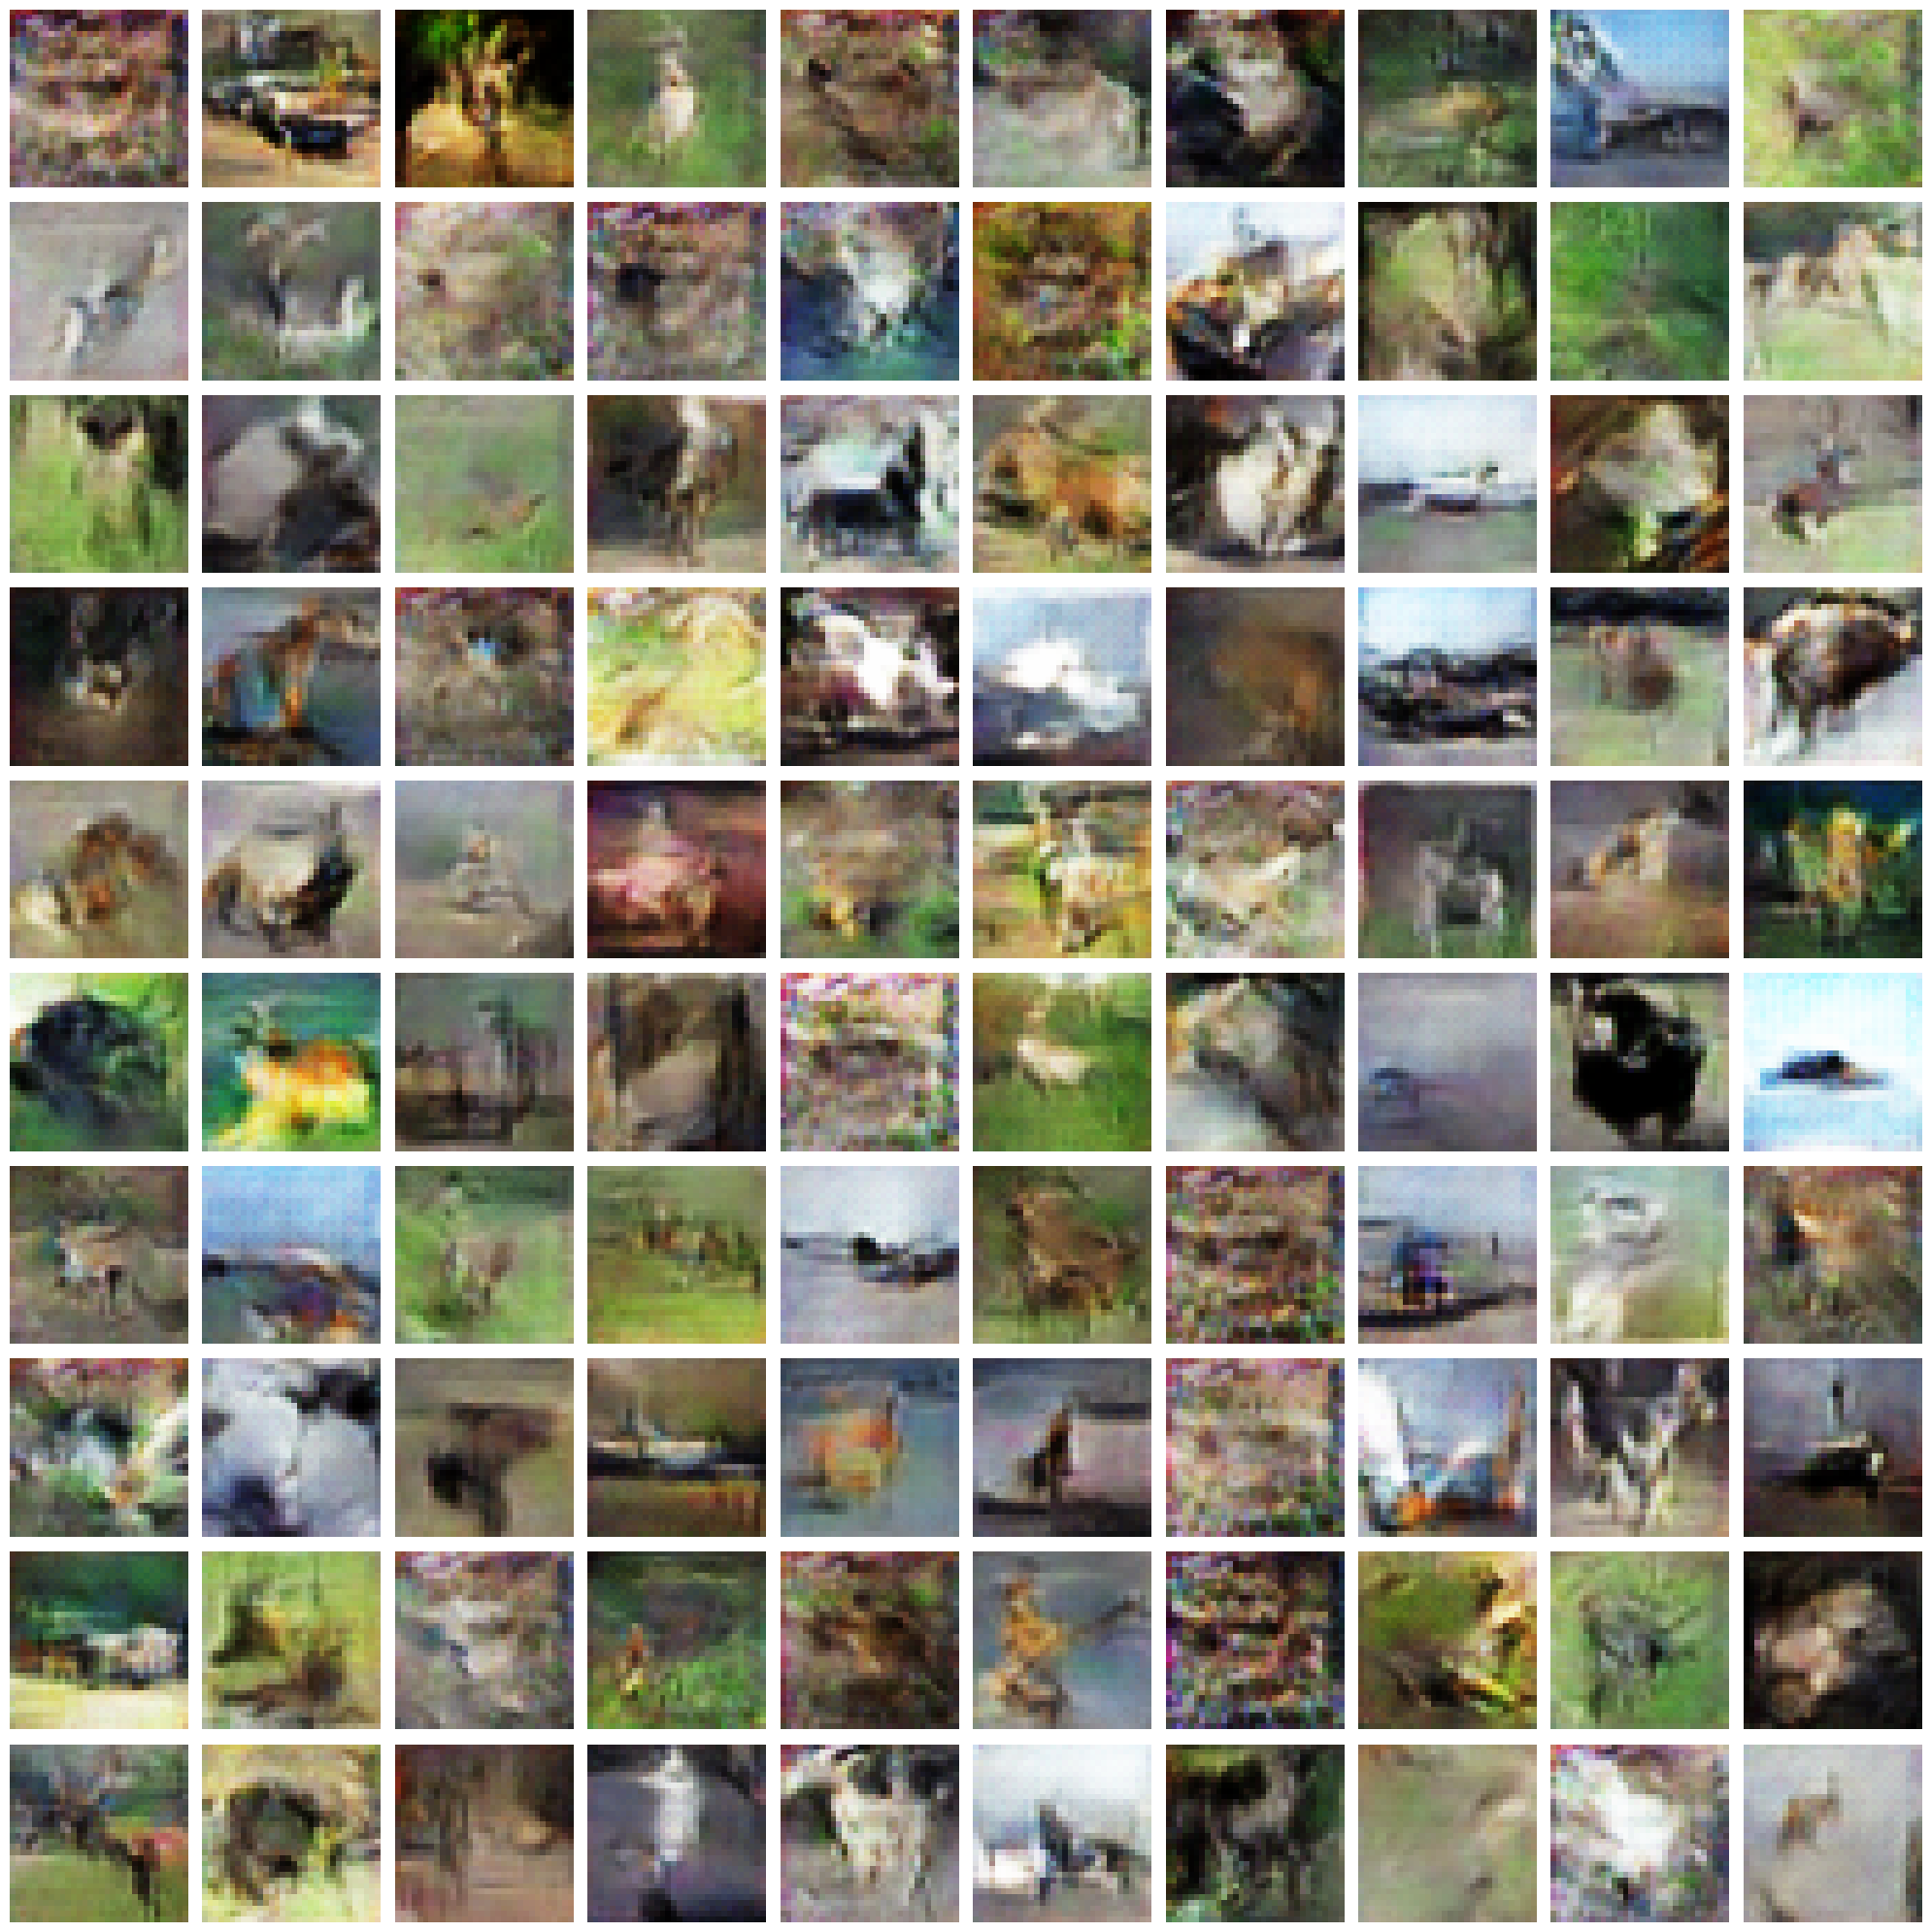

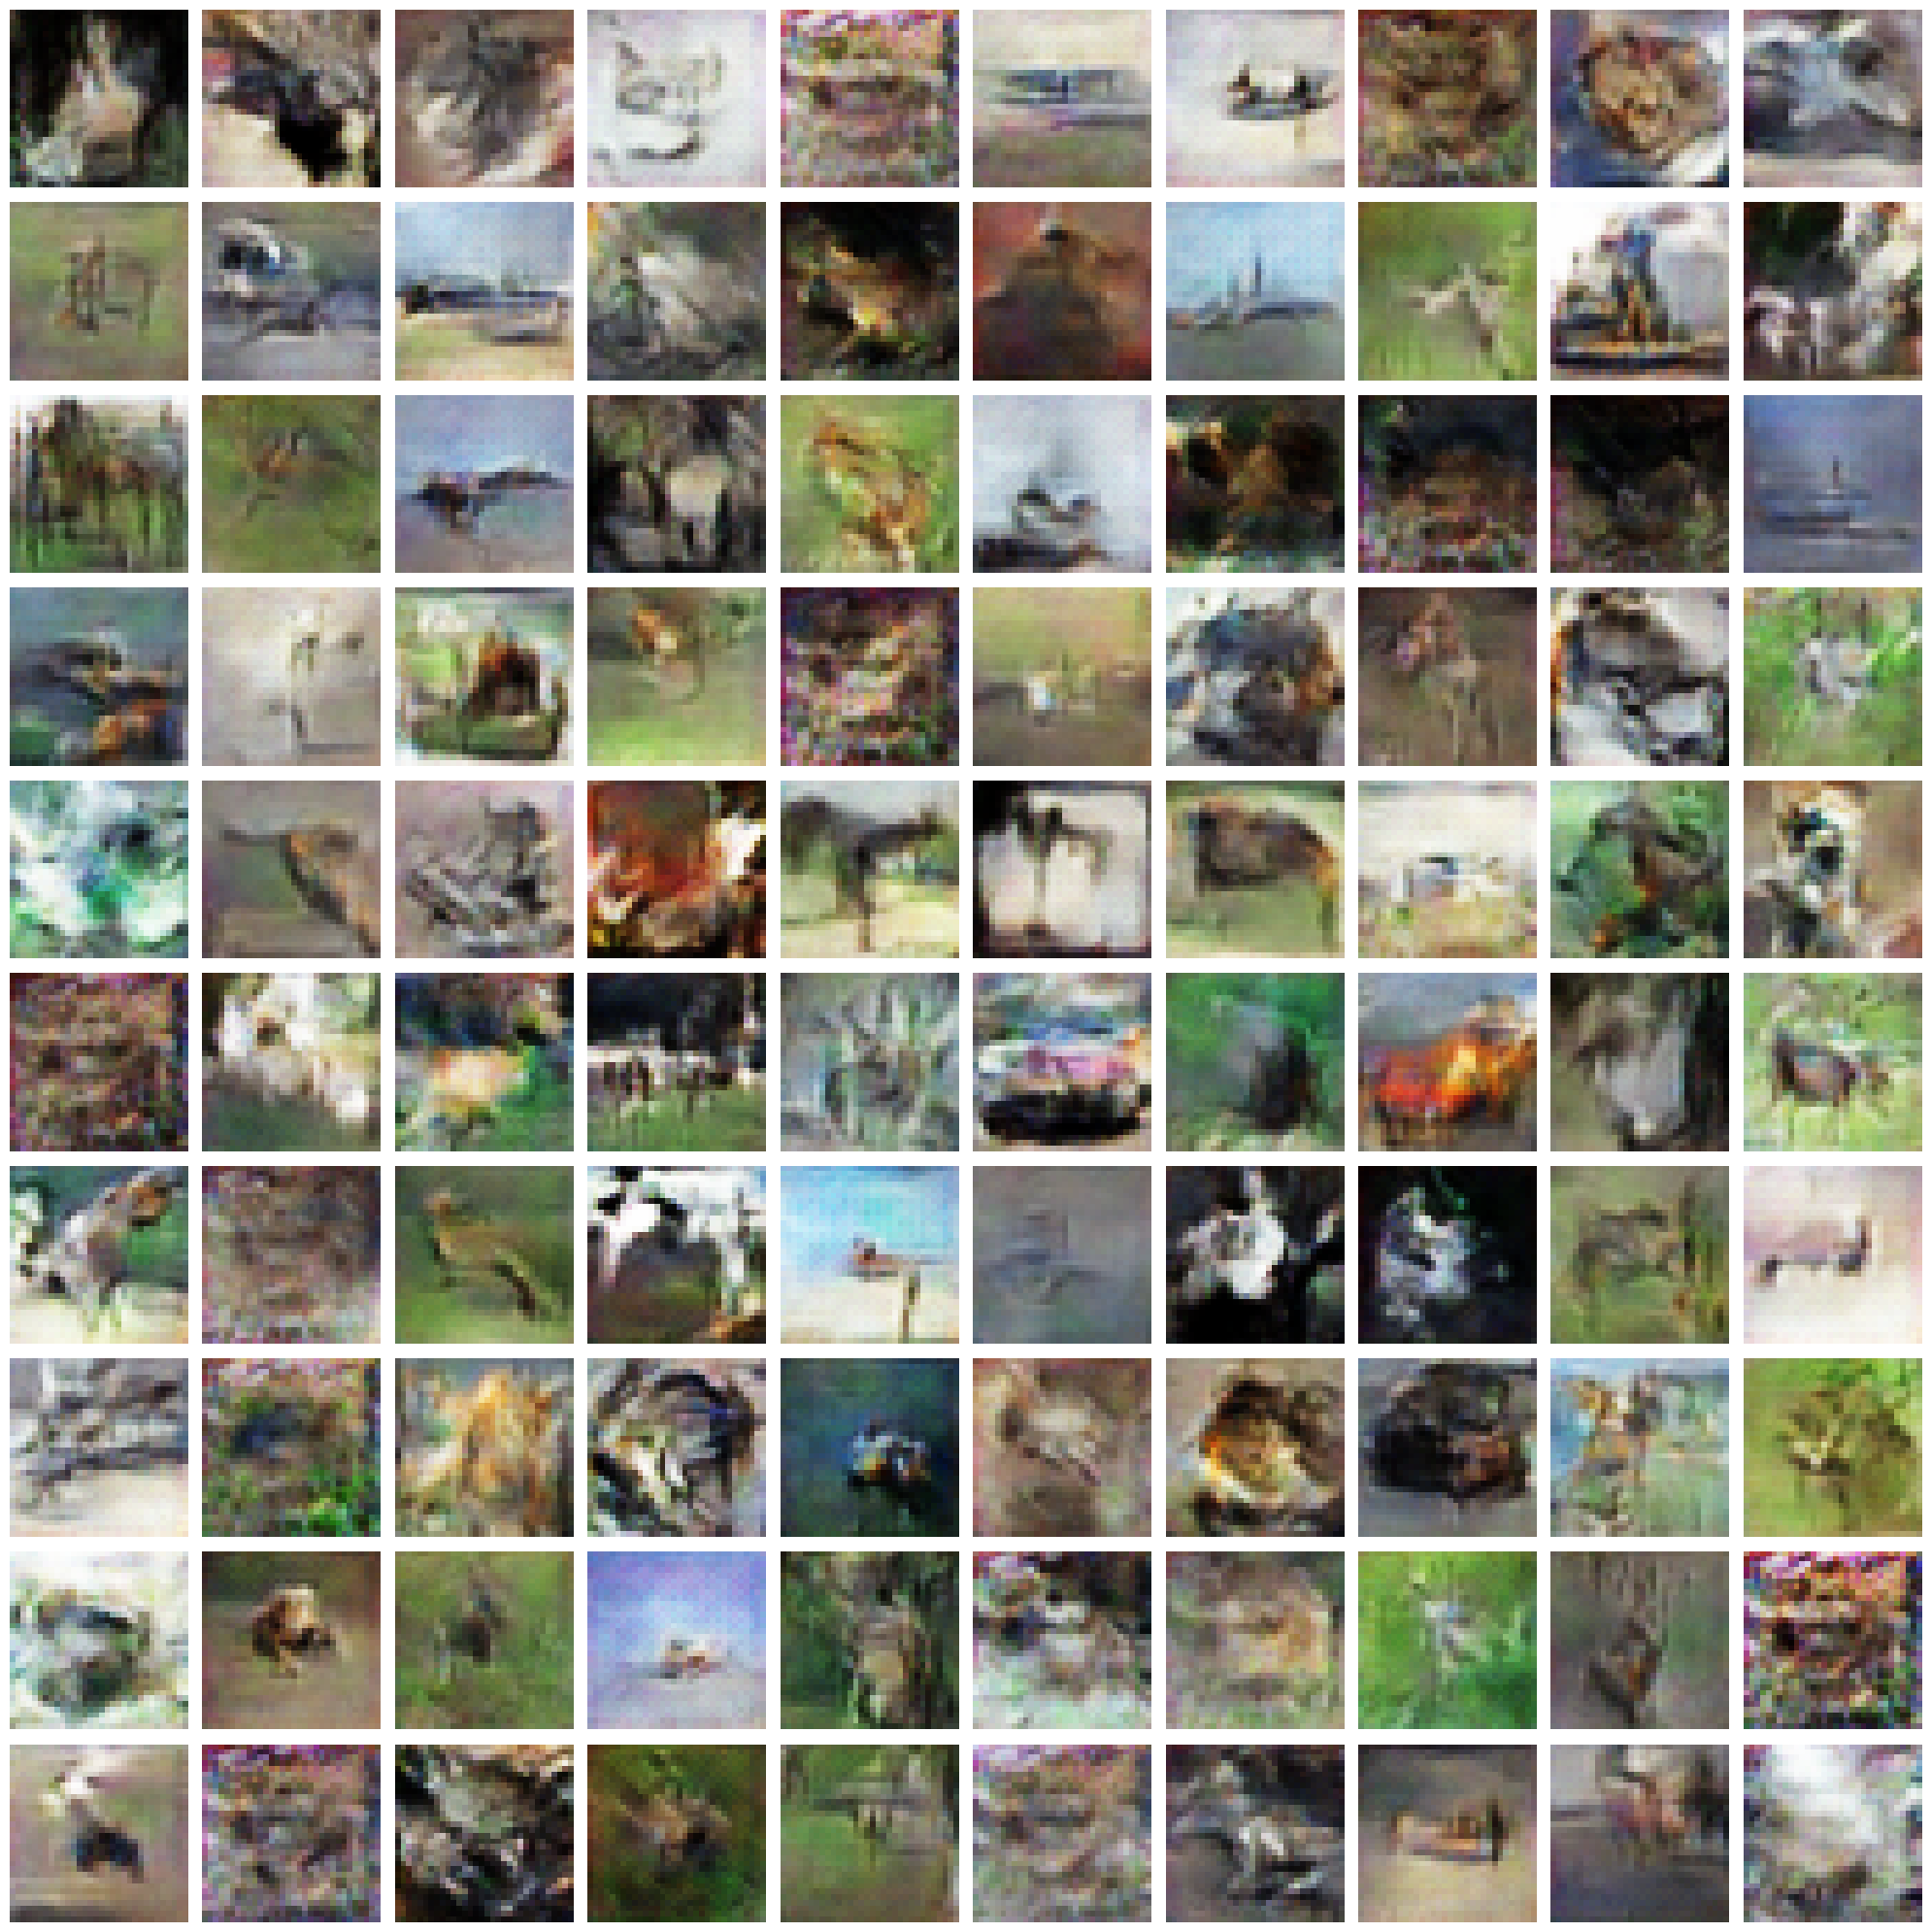

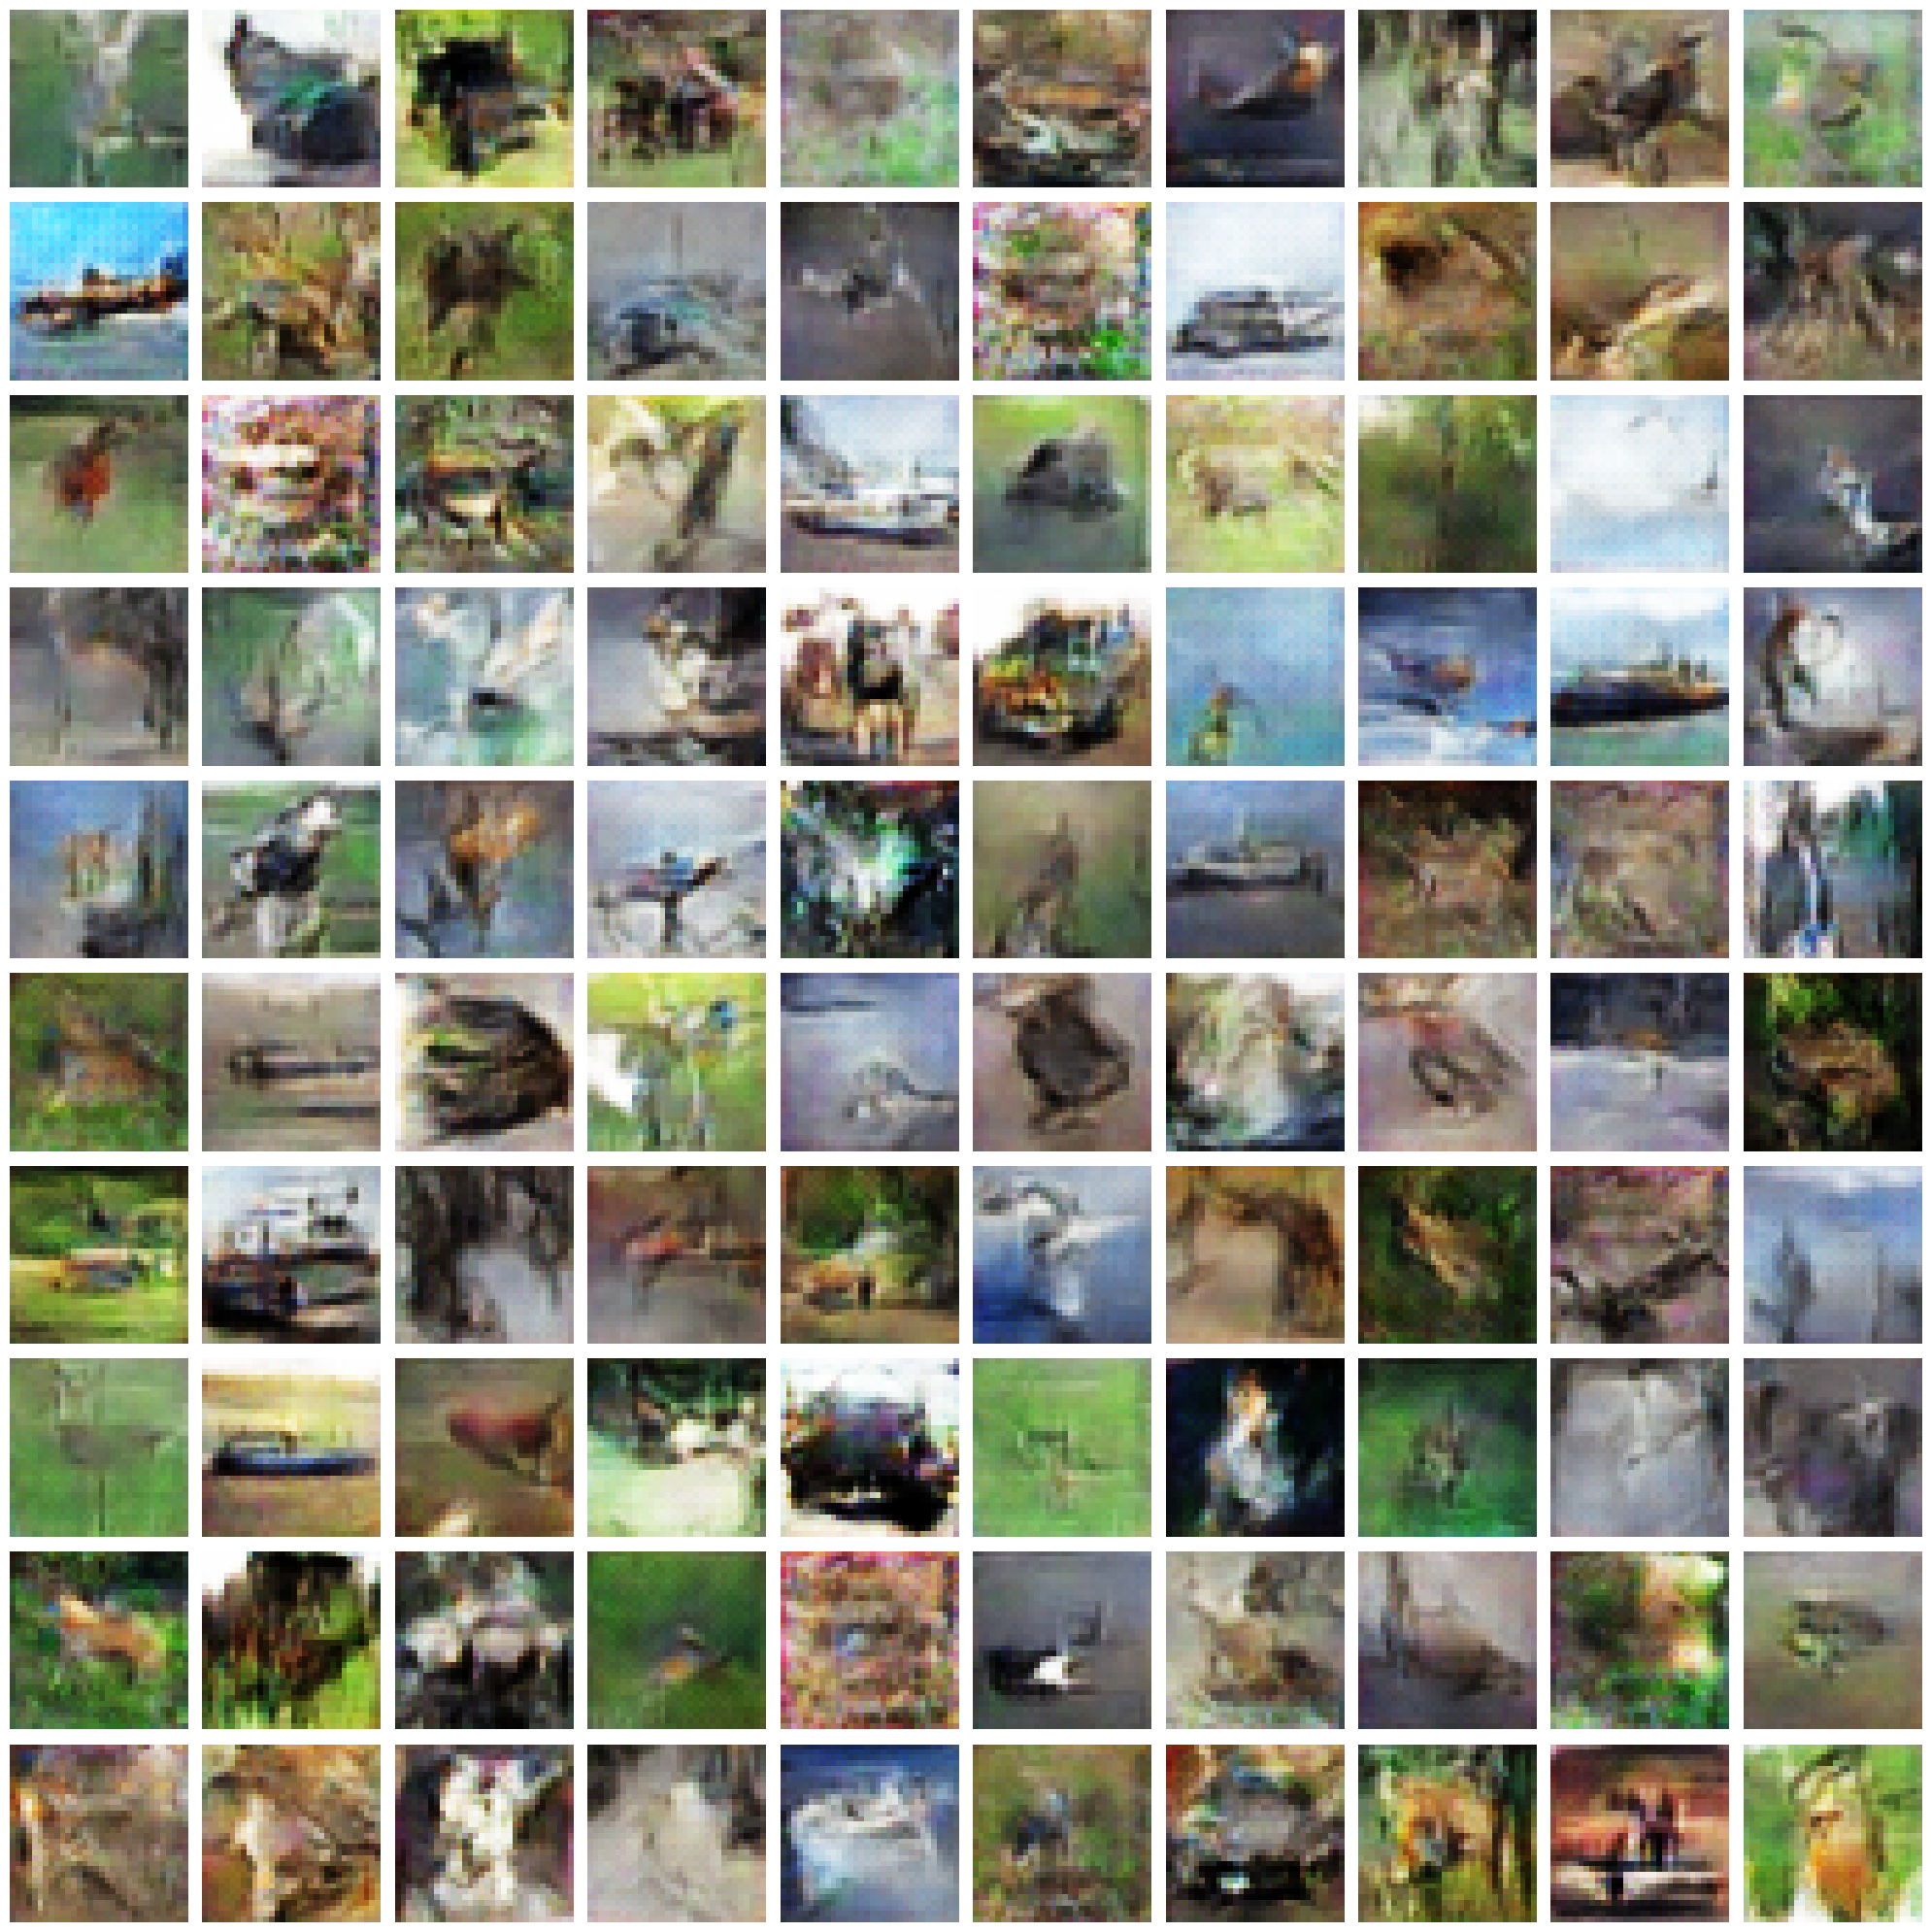

In [7]:
for i in range(10):
    # creating noise
    latent_z = np.random.normal(size=(100, 128))
    
    imgs = gan_generator.predict(latent_z)
    
    fig = plt.figure(figsize=(20, 20), tight_layout=True)
    for idx, img in enumerate(imgs):
        ax = fig.add_subplot(10, 10, idx+1)
        ax.imshow((img + 1) / 2)
        ax.axis('off')
    fig.savefig(fname="./images/DCGAN/{}.jpeg".format(class_names[i]))